<br>
<font size=3><b>Задание: </b></font><br>
Имеется датасет (набор данных). Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта. <br>
Ссылка:
https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing
<br>
<br>

In [285]:
!pip install plotly

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

In [552]:
data = pd.read_csv('data/trainData.csv')
print(f'Objects: {data.shape[0]}')
print(f'Features: {data.shape[1]}')
data.head()

Objects: 9800
Features: 6


,ID,Order Date,Class,Region,Sub-Category,Sales
0,1,08/11/2017,Второй класс,Москва,Bookcases,"4524,355"
1,2,08/11/2017,Второй класс,Москва,Chairs,"22171,3"
2,3,12/06/2017,Второй класс,Калиниград,Labels,"22847,75"
3,4,11/10/2016,Стандарт,Москва,Tables,"12217,76"
4,5,11/10/2016,Стандарт,Москва,Storage,"20300,85"


In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


Пропуски отсутствуют, но <b>Sales</b> ошибочно является object

In [554]:
data['Sales'] = data['Sales'].map(lambda x: x.replace(',', '.')).astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9800 non-null   int64  
 1   Order Date    9800 non-null   object 
 2   Class         9800 non-null   object 
 3   Region        9800 non-null   object 
 4   Sub-Category  9800 non-null   object 
 5   Sales         9800 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 459.5+ KB


Посмотрим на распределение категориальных признаков

In [555]:
categorical_columns = [col for col in data
                       if data[col].dtype == 'object']

for col in categorical_columns:
    print('*'*5, col, '*'*5)
    print(data[col].value_counts())
    print('\n')

***** Order Date *****
05/09/2017    38
10/11/2017    35
02/12/2018    34
01/12/2018    34
02/09/2018    33
              ..
25/02/2017     1
25/10/2017     1
21/02/2015     1
11/09/2015     1
09/05/2016     1
Name: Order Date, Length: 1230, dtype: int64


***** Class *****
Стандарт        5859
Второй класс    1902
Первый класс    1501
Same Day         538
Name: Class, dtype: int64


***** Region *****
Калиниград     3140
Владивосток    2785
Урал           2277
Москва         1598
Name: Region, dtype: int64


***** Sub-Category *****
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64




In [556]:
def pie_draw(df: pd.DataFrame, title: str, cols: str) -> None:
    """
    Функция для отрисовки круговой диаграммы
    :param data: Данные, по которым строится график
    :param title: Название графика
    :param cols: Название признаков
    :return: None
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle(title)
    fig.tight_layout(h_pad=3, w_pad=3)
    plt.subplots_adjust(top=0.95)

    sns.set_theme(style='whitegrid', palette='flare')
    ax.pie(x=df[cols].value_counts(), labels=df[cols].value_counts().index, autopct='%.0f%%')
    plt.show()
    
    
def hist_draw(df: pd.DataFrame, title: str, cols: str) -> None:
    """
    Функция для отрисовки гистограммы
    :param data: Данные, по которым строится график
    :param title: Название графика
    :param cols: Название признаков
    :return: None
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle(title)
    fig.tight_layout(h_pad=3, w_pad=3)
    plt.subplots_adjust(top=0.95)
    fig.autofmt_xdate(rotation=45)
    plt.tick_params(axis='both', which='major', labelsize=10)

    sns.set_theme(style='whitegrid', palette="flare")
    sns.countplot(x=df['Sub-Category'])
    plt.show()

<br>
<font size=4>Задание 1</font><br>
<br>
а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?<br>
б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?<br>
в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?<br>
<br>
Подгруппа – Sub-Category  <br>
Дата – Order_date<br>
Сделать вывод на основе полученных результатов.<br>
<hr>

а) Наиболее популярные виды подгрупп за все время продаж

In [557]:
data['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

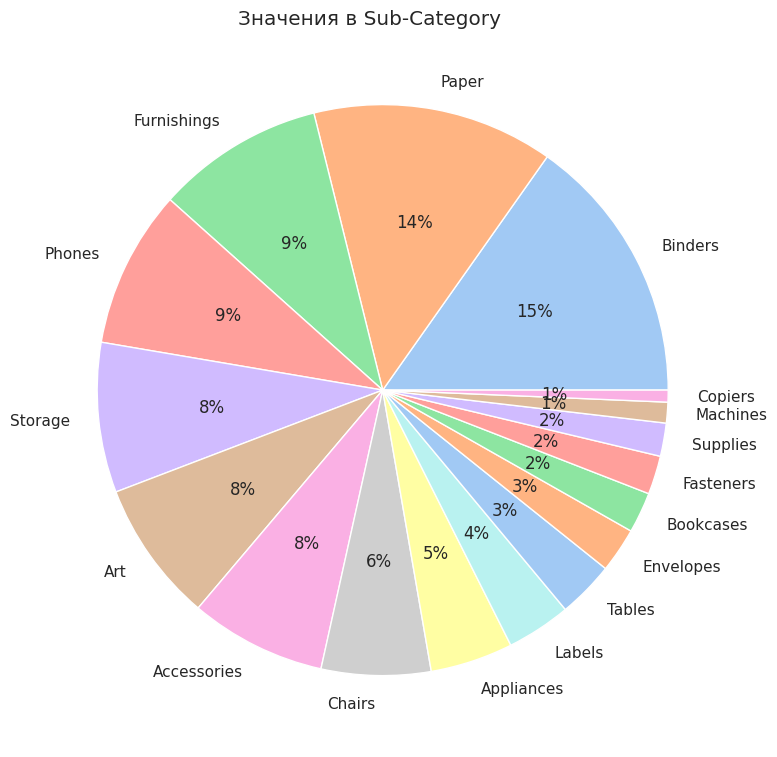

In [558]:
pie_draw(df=data, title='Значения в Sub-Category', cols='Sub-Category')

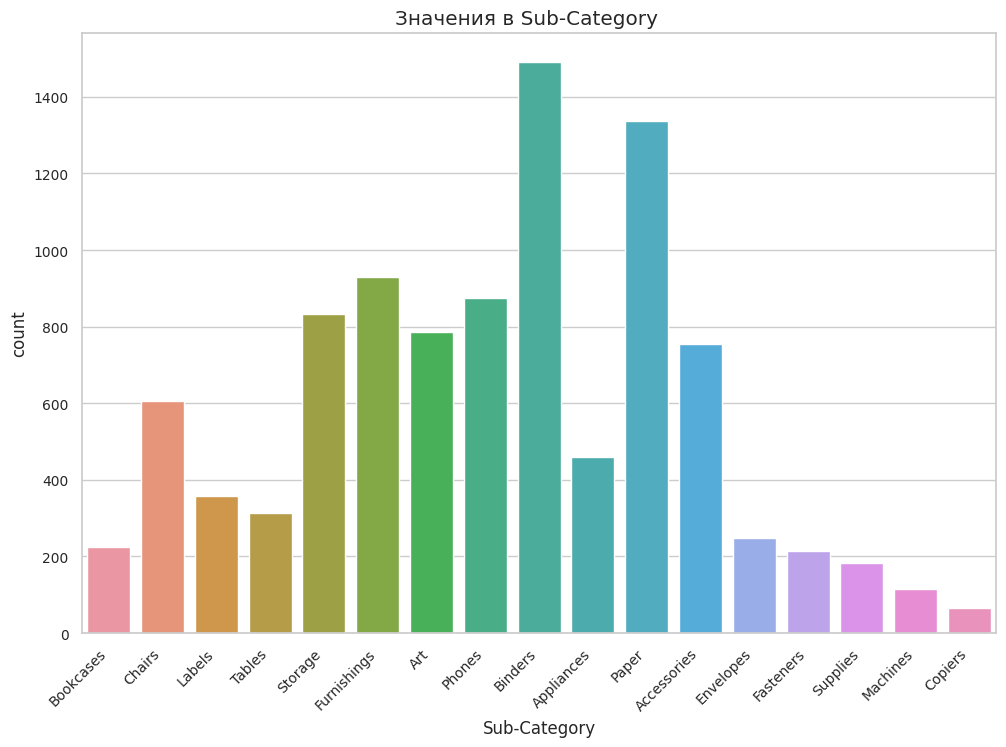

In [559]:
hist_draw(df=data, title='Значения в Sub-Category', cols='Sub-Category')

б) Наиболее популярные подгруппы за последние два года (2018 и 2017)

In [560]:
# Проверка, что 2018 год - законченный год и его можно включить в качестве последнего года
data[data['Order Date'].map(lambda x: True if '30/12/2018' == x else False)] 

,ID,Order Date,Class,Region,Sub-Category,Sales
645,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
906,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
907,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
908,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
1296,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
1297,1298,30/12/2018,Стандарт,Калиниград,Binders,7366.876
5091,5092,30/12/2018,Стандарт,Калиниград,Fasteners,42478.360


In [561]:
data_current = data.copy()
data_current['Order Date'] = data_current['Order Date'].map(lambda x: x.split('/')[2]).astype('int64')
max_year = data_current['Order Date'].max() # 2018

last_2year = data_current[data_current['Order Date'] >= max_year - 1] # 2018, 2017
print('Наиболее популярные подгруппы за 2 года:')
last_2year['Sub-Category'].value_counts()

Наиболее популярные подгруппы за 2 года:


Binders        900
Paper          809
Furnishings    557
Phones         510
Storage        490
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Envelopes      130
Bookcases      130
Fasteners      121
Supplies       117
Machines        65
Copiers         36
Name: Sub-Category, dtype: int64

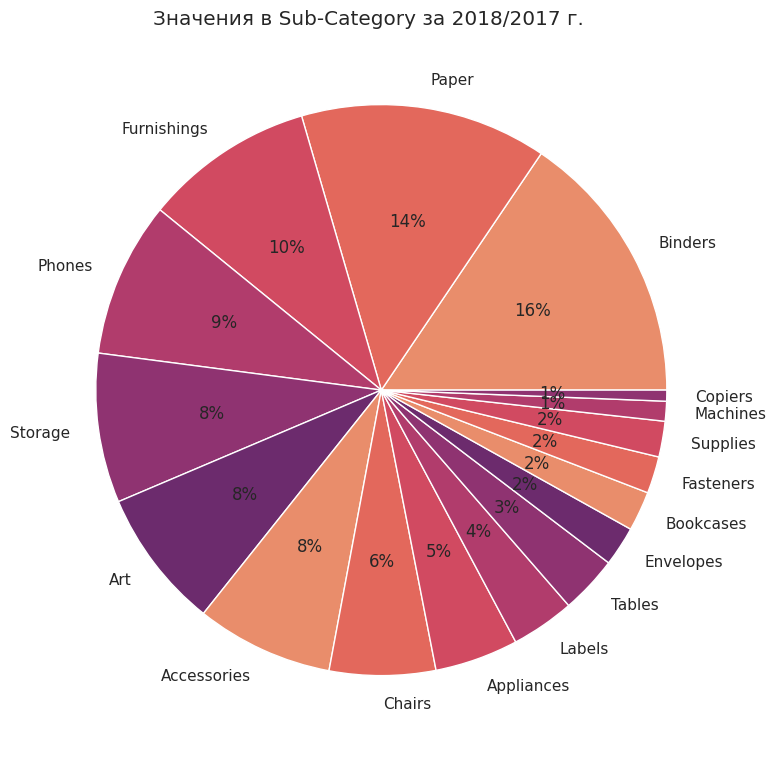

In [562]:
pie_draw(df=last_2year, title='Значения в Sub-Category за 2018/2017 г.', cols='Sub-Category')

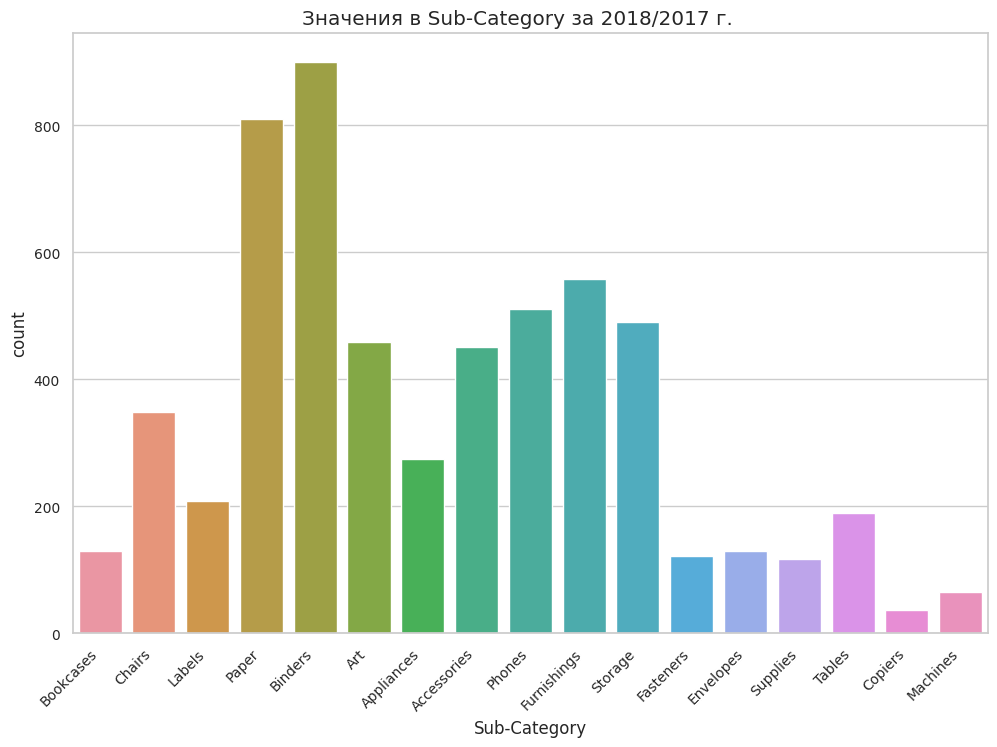

In [563]:
hist_draw(df=last_2year, title='Значения в Sub-Category за 2018/2017 г.', cols='Sub-Category')

б) Наиболее популярные подгруппы за последний год (2018)

In [564]:
last_1year = data_current[data_current['Order Date'] == max_year]
last_1year['Sub-Category'].value_counts()

Binders        492
Paper          452
Furnishings    310
Phones         290
Storage        281
Art            279
Accessories    266
Chairs         187
Appliances     161
Labels         113
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        58
Machines        33
Copiers         22
Name: Sub-Category, dtype: int64

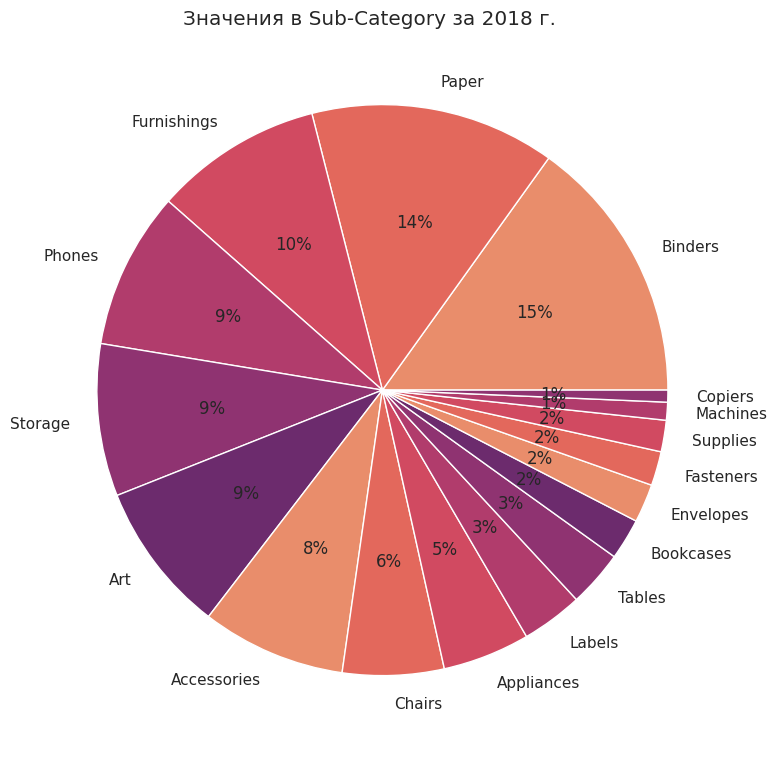

In [565]:
pie_draw(df=last_1year, title='Значения в Sub-Category за 2018 г.', cols='Sub-Category')

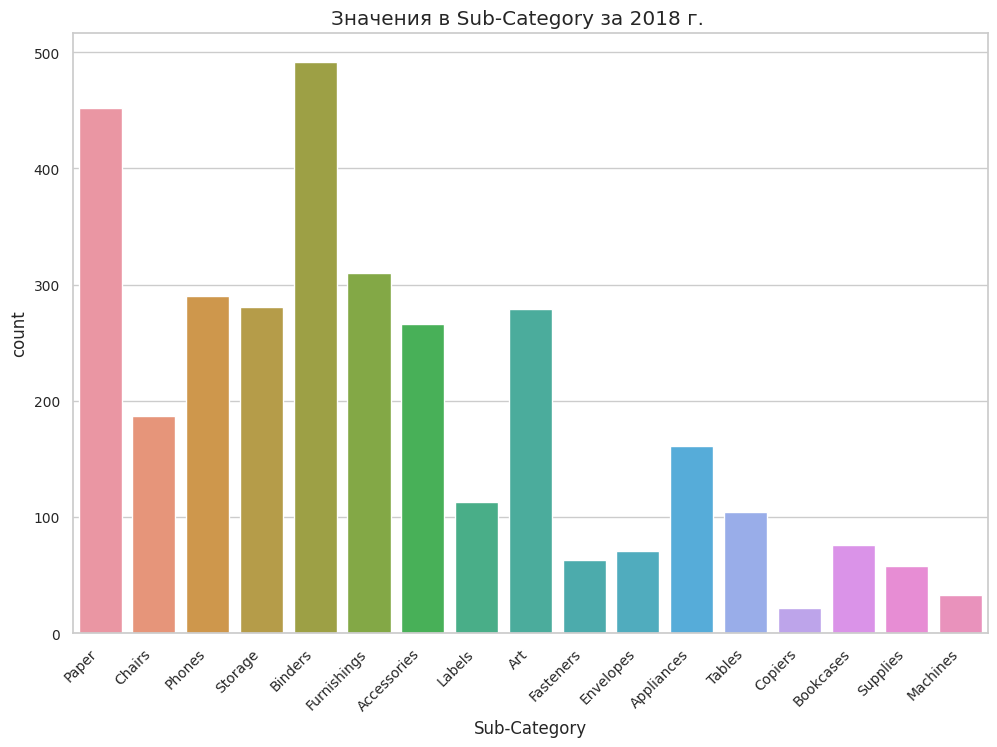

In [566]:
hist_draw(df=last_1year, title='Значения в Sub-Category за 2018 г.', cols='Sub-Category')

Вывод

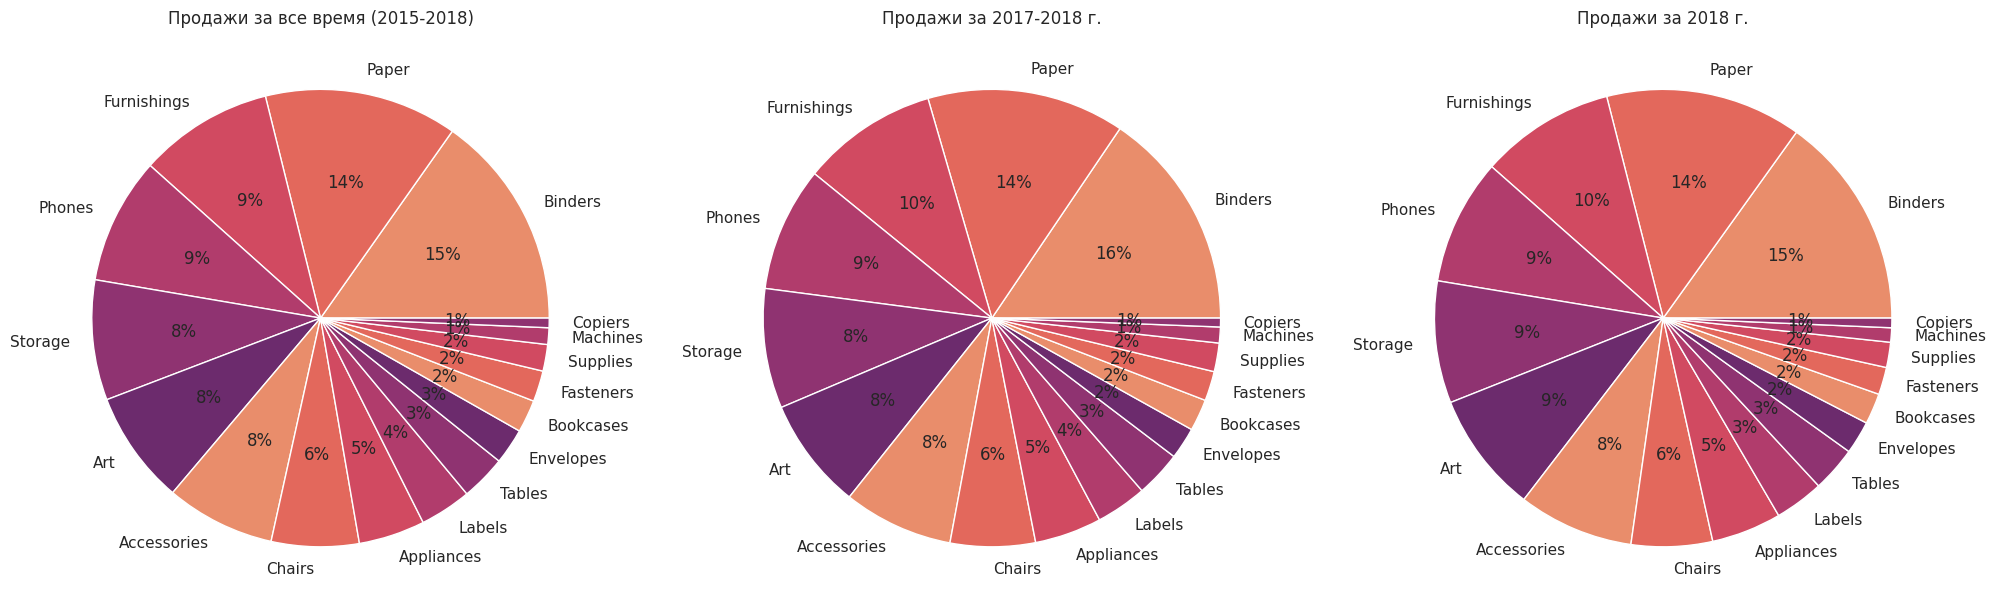

In [567]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax = ax.flatten()
fig.tight_layout(h_pad=3, w_pad=3)
plt.subplots_adjust(top=0.95)

sns.set_theme(style='whitegrid', palette="flare")
ax[0].pie(x=data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index, autopct='%.0f%%')
ax[0].set_title('Продажи за все время (2015-2018)')
ax[1].pie(x=last_2year['Sub-Category'].value_counts(), labels=last_2year['Sub-Category'].value_counts().index, autopct='%.0f%%')
ax[1].set_title('Продажи за 2017-2018 г.')
ax[2].pie(x=last_1year['Sub-Category'].value_counts(), labels=last_2year['Sub-Category'].value_counts().index, autopct='%.0f%%')
ax[2].set_title('Продажи за 2018 г.')
plt.show()

<font size=3>Вывод:</font><br>
Популярность подгрупп в разные периоды не менялась. Процентное соотношение практические не изменялось.

<br>
<font size=4>Задание 2</font><br>
<br>
Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). <br>
Можно использовать правило трех сигм. Однако любые другие решения приветствуются.<br>
<hr>

In [568]:
data

,ID,Order Date,Class,Region,Sub-Category,Sales
0,1,08/11/2017,Второй класс,Москва,Bookcases,4524.355
1,2,08/11/2017,Второй класс,Москва,Chairs,22171.300
2,3,12/06/2017,Второй класс,Калиниград,Labels,22847.750
3,4,11/10/2016,Стандарт,Москва,Tables,12217.760
4,5,11/10/2016,Стандарт,Москва,Storage,20300.850
...,...,...,...,...,...,...
9795,9796,21/05/2017,Стандарт,Урал,Binders,36239.290
9796,9797,12/01/2016,Стандарт,Владивосток,Art,6995.611
9797,9798,12/01/2016,Стандарт,Владивосток,Phones,18379.500
9798,9799,12/01/2016,Стандарт,Владивосток,Phones,36370.840


In [569]:
data['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

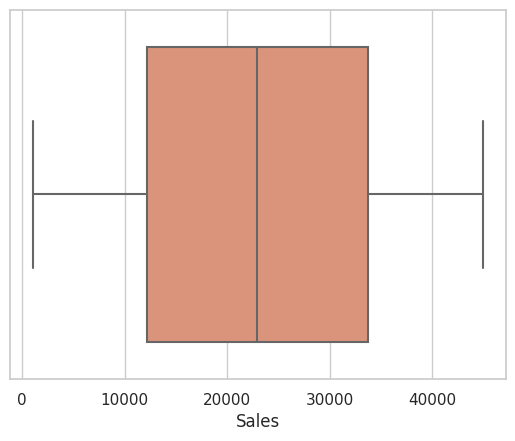

In [570]:
sns.boxplot(x=data['Sales'])
plt.show()

<b>Boxplot</b> для <b>Sales</b> показывает, что выбросов нет. <br>
Если посмотреть на ячейку выше, то можно увидеть, что процентили между собой имеют небольшую разницу относительно своего диапазона, то есть от минимума к максимуму числа подходили равномерно - это указывает на отсутствие выбросов. <br>

Если бы выбросы существовали, можно было бы от них избавиться методом 3 сигм либо же используя правила:<br>
Выбросы - это значения за пределами:
 - 25% перцентили минус 1.5 * МКР
 - 75% перцентили минус 1.5 * МКР
 
где МКР - Межквартильная разность (Квартиль3 - Квартиль1) 

Но если Sales сложить по дате, то график меняется и появляются выбросы

In [571]:
data_sales = data.groupby(['Order Date']).agg({'Sales': 'sum'}).reset_index()
data_sales = data_sales.set_index('Order Date')
data_sales = data_sales['Sales']
data_sales

Order Date
01/01/2018    223242.312
01/02/2015     29213.280
01/02/2017     40632.752
01/03/2015    192058.041
01/03/2016     99482.461
                 ...    
31/10/2017    221299.430
31/10/2018     64301.198
31/12/2015    387082.690
31/12/2016    215500.874
31/12/2017    217776.471
Name: Sales, Length: 1230, dtype: float64

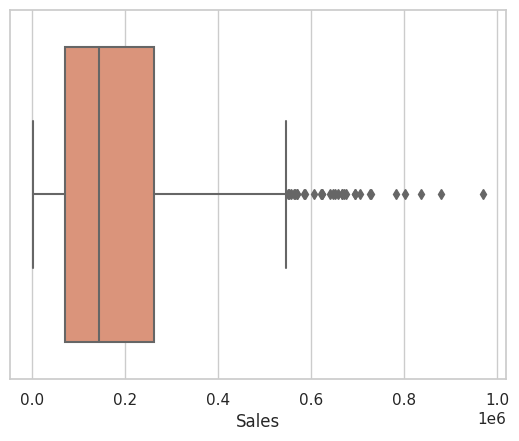

In [572]:
sns.boxplot(x=data_sales)
plt.show()

Выбросы есть, поэтому необходимо от них избавиться, кстати, только по правой части (от 75%).

In [573]:
def set_border(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    left_border = round(q1 - 1.5 * iqr, 2)
    right_border = round(q3 + 1.5 * iqr, 2)
    
    if left_border < column.min():
        left_border = column.min()
        
    if right_border > column.max():
        right_border = column.max()
        
    return left_border, right_border

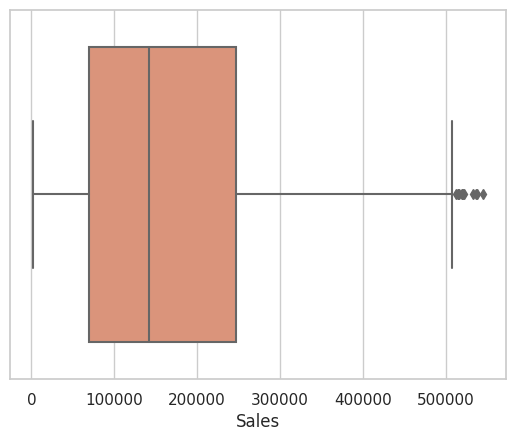

In [574]:
data_sales = data_sales[(data_sales >= set_border(data_sales)[0]) & (data_sales <= set_border(data_sales)[1])]

sns.boxplot(x=data_sales)
plt.show()

<br>
<font size=4>Задание 3</font><br>
Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.
<hr>

In [575]:
data

,ID,Order Date,Class,Region,Sub-Category,Sales
0,1,08/11/2017,Второй класс,Москва,Bookcases,4524.355
1,2,08/11/2017,Второй класс,Москва,Chairs,22171.300
2,3,12/06/2017,Второй класс,Калиниград,Labels,22847.750
3,4,11/10/2016,Стандарт,Москва,Tables,12217.760
4,5,11/10/2016,Стандарт,Москва,Storage,20300.850
...,...,...,...,...,...,...
9795,9796,21/05/2017,Стандарт,Урал,Binders,36239.290
9796,9797,12/01/2016,Стандарт,Владивосток,Art,6995.611
9797,9798,12/01/2016,Стандарт,Владивосток,Phones,18379.500
9798,9799,12/01/2016,Стандарт,Владивосток,Phones,36370.840


In [576]:
def check_group(x):
    count = data['Sales'].max() / 3
    group_name = ''
    
    if x <= count:
        group_name = 'small sales'
    if count < x <= count * 2:
        group_name = 'medium sales'
    if x > count * 2:
        group_name = 'big sales'
        
    return group_name

In [577]:
data['Sales-Group'] = data['Sales'].map(check_group)
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales-Group
0,1,08/11/2017,Второй класс,Москва,Bookcases,4524.355,small sales
1,2,08/11/2017,Второй класс,Москва,Chairs,22171.300,medium sales
2,3,12/06/2017,Второй класс,Калиниград,Labels,22847.750,medium sales
3,4,11/10/2016,Стандарт,Москва,Tables,12217.760,small sales
4,5,11/10/2016,Стандарт,Москва,Storage,20300.850,medium sales


<br>
<font size=4>Наиболее прибыльная группа</font>
<br><br>

medium sales    3381
big sales       3293
small sales     3126
Name: Sales-Group, dtype: int64


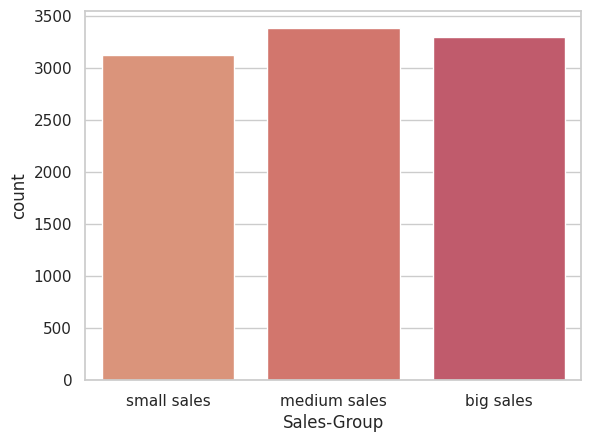

In [578]:
sales_group_counts = data['Sales-Group'].value_counts()
print(sales_group_counts)

sns.countplot(x=data['Sales-Group'])
plt.show()

За все время количество small, medium и big sales оказалось практическим одинаковым, следовательно big sales принесли больше прибыли.

In [579]:
print(f'Прибыль от big sales: {data[data["Sales-Group"] == "big sales"]["Sales"].sum()}')
print(f'Прибыль от medium sales: {data[data["Sales-Group"] == "medium sales"]["Sales"].sum()}')
print(f'Прибыль от small sales: {data[data["Sales-Group"] == "small sales"]["Sales"].sum()}')

Прибыль от big sales: 123135544.26
Прибыль от medium sales: 76276560.93
Прибыль от small sales: 25221120.628


GroupBY по Region и Sales-Group

In [580]:
agg_func_math = {
    'Sales': ['sum', 'mean', 'min', 'max', 'std', 'count']
}

data_group = data.groupby(['Region', 'Sales-Group']).agg(agg_func_math).round(2)
data_group

Sales                                         \
                                  sum      mean       min       max      std   
Region      Sales-Group                                                        
Владивосток big sales     36052609.12  37398.97  30011.50  44990.44  4373.00   
            medium sales  20743516.75  22547.30  15001.36  29978.86  4350.01   
            small sales    7156561.02   7942.91   1003.08  14995.92  4063.00   
Калиниград  big sales     38144693.44  37507.07  29997.44  44986.26  4332.36   
            medium sales  25601338.77  22656.05  15010.24  29988.81  4327.82   
            small sales    8184267.51   8241.96   1021.10  14989.18  4068.46   
Москва      big sales     20469544.35  37421.47  30096.39  44995.41  4184.50   
            medium sales  12410277.35  22605.24  15028.56  29992.12  4235.27   
            small sales    4011829.81   7991.69   1012.54  14978.64  4033.67   
Урал        big sales     28468697.35  37213.98  29999.43  44942.31  4426.84   
            medium sales  17521428.06  22405.92  15004.40  29987.58  4308.09   
            small sales    5868462.29   8038.99   1002.79  14998.36  4059.07   

                                
                         count  
Region      Sales-Group         
Владивосток big sales      964  
            medium sales   920  
            small sales    901  
Калиниград  big sales     1017  
            medium sales  1130  
            small sales    993  
Москва      big sales      547  
            medium sales   549  
            small sales    502  
Урал        big sales      765  
            medium sales   782  
            small sales    730

<br>
<font size=4>Какой город делает больше всего закупок?</font>
<br><br>

In [581]:
data_count = data_group['Sales']['count'].reset_index()
data_count

,Region,Sales-Group,count
0,Владивосток,big sales,964
1,Владивосток,medium sales,920
2,Владивосток,small sales,901
3,Калиниград,big sales,1017
4,Калиниград,medium sales,1130
5,Калиниград,small sales,993
6,Москва,big sales,547
7,Москва,medium sales,549
8,Москва,small sales,502
9,Урал,big sales,765


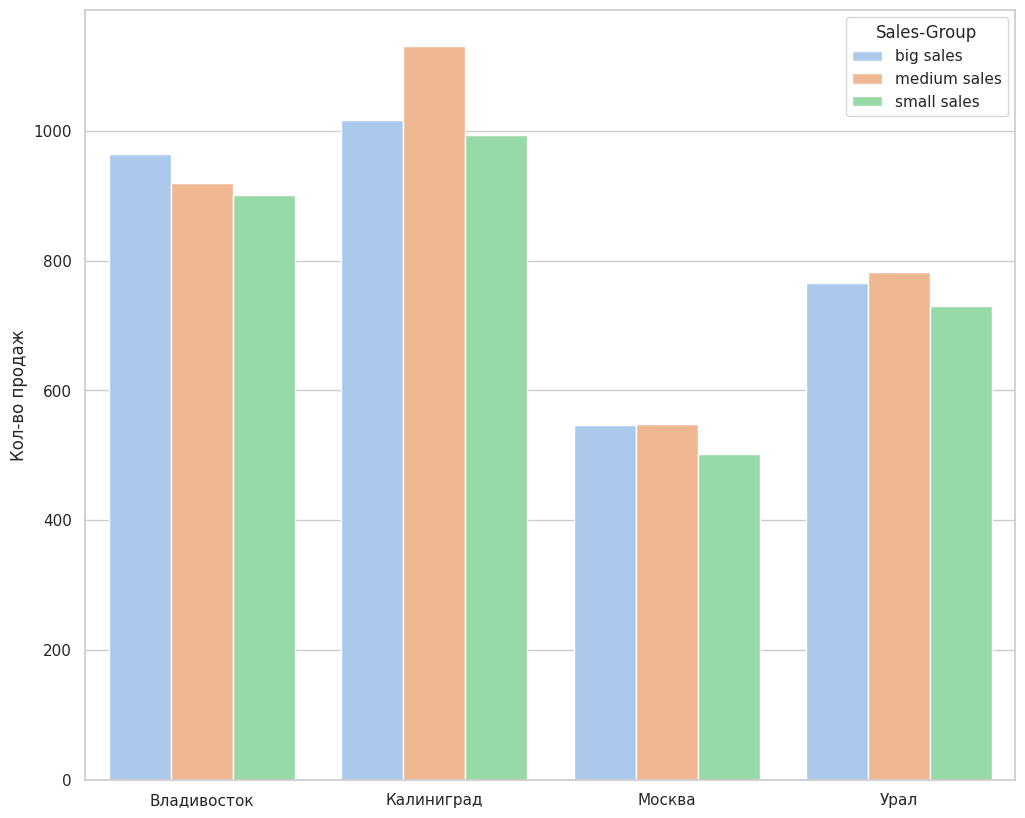

In [582]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.ylabel('Кол-во продаж')

sns.set_theme(style='whitegrid', palette="pastel")
sns.barplot(x=data_count['Region'].values, y=data_count['count'].values, hue=data_count['Sales-Group'])
plt.show()

 <br>
 
 - Калининград делает больше всего закупок
 - Москва меньше остальных городов
 
 <br>

<br>
<font size=4>Задание 4</font><br>
Спрогнозировать продажи для подкатегорий любым методом регрессии:

 - Phones
 - Art
 
<hr>

In [583]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_absolute_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from typing import Union

<br>
<font size=3>Прогнозирование для <b>Phones:</b></font>
<br><br>

In [584]:
data_phones = data[data['Sub-Category'] == 'Phones']
data_phones

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales-Group
7,8,09/06/2015,Стандарт,Калиниград,Phones,2624.517,small sales
11,12,09/06/2015,Стандарт,Калиниград,Phones,36293.560,big sales
19,20,27/08/2015,Второй класс,Калиниград,Phones,35708.880,big sales
35,36,08/12/2017,Первый класс,Урал,Phones,14777.020,small sales
40,41,27/12/2016,Стандарт,Урал,Phones,24711.220,medium sales
...,...,...,...,...,...,...,...
9764,9765,18/06/2015,Стандарт,Калиниград,Phones,2082.769,small sales
9773,9774,26/06/2017,Стандарт,Москва,Phones,23379.540,medium sales
9780,9781,14/09/2017,Стандарт,Владивосток,Phones,13017.510,small sales
9797,9798,12/01/2016,Стандарт,Владивосток,Phones,18379.500,medium sales


В наборе есть пропуски по дням, из-за этого не получится построить предсказание.
Необходимо просуммировать Sales по месяцу и годы.

In [588]:
data_phones['Order Date'] = data_phones['Order Date'].map(lambda x: '-'.join(x.split('/')[1:]))
data_phones

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales-Group
7,8,06-2015,Стандарт,Калиниград,Phones,2624.517,small sales
11,12,06-2015,Стандарт,Калиниград,Phones,36293.560,big sales
19,20,08-2015,Второй класс,Калиниград,Phones,35708.880,big sales
35,36,12-2017,Первый класс,Урал,Phones,14777.020,small sales
40,41,12-2016,Стандарт,Урал,Phones,24711.220,medium sales
...,...,...,...,...,...,...,...
9764,9765,06-2015,Стандарт,Калиниград,Phones,2082.769,small sales
9773,9774,06-2017,Стандарт,Москва,Phones,23379.540,medium sales
9780,9781,09-2017,Стандарт,Владивосток,Phones,13017.510,small sales
9797,9798,01-2016,Стандарт,Владивосток,Phones,18379.500,medium sales


In [868]:
data_phones = data_phones.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
data_phones

,Order Date,Sales
0,2015-01-01,162452.996
1,2015-02-01,89768.420
2,2015-03-01,255339.928
3,2015-04-01,338716.225
4,2015-05-01,329883.085
5,2015-06-01,151197.587
6,2015-07-01,307310.280
7,2015-08-01,306825.982
8,2015-09-01,329676.775
9,2015-10-01,338710.680


In [596]:
data_phones['Order Date'] = pd.to_datetime(data_phones['Order Date'], infer_datetime_format=True)
data_phones

,Order Date,Sales
0,2015-01-01,162452.996
1,2015-02-01,89768.420
2,2015-03-01,255339.928
3,2015-04-01,338716.225
4,2015-05-01,329883.085
5,2015-06-01,151197.587
6,2015-07-01,307310.280
7,2015-08-01,306825.982
8,2015-09-01,329676.775
9,2015-10-01,338710.680


In [650]:
data_train = data_phones.set_index('Order Date')
data_train.index = data_train.index.astype('Period[M]')
data_train = data_train['Sales'].sort_index()
data_train

Order Date
2015-01    162452.996
2015-02     89768.420
2015-03    255339.928
2015-04    338716.225
2015-05    329883.085
2015-06    151197.587
2015-07    307310.280
2015-08    306825.982
2015-09    329676.775
2015-10    338710.680
2015-11    759484.707
2015-12    448814.393
2016-01    104557.161
2016-02     85391.391
2016-03    338766.020
2016-04    531228.859
2016-05    305024.538
2016-06    359061.773
2016-07    303262.595
2016-08    307451.499
2016-09    521668.358
2016-10    536065.299
2016-11    557372.749
2016-12    544529.565
2017-01    223915.260
2017-02    234905.471
2017-03    561661.863
2017-04    380698.087
2017-05    446329.715
2017-06    345305.969
2017-07    458640.738
2017-08    544666.255
2017-09    602948.523
2017-10    281866.910
2017-11    634852.371
2017-12    584455.748
2018-01    312474.207
2018-02    341048.120
2018-03    514869.548
2018-04    244791.100
2018-05    436601.197
2018-06    596463.727
2018-07    593747.238
2018-08    385384.132
2018-09    868095.252

In [651]:
def get_distribution(*data: Union[pd.Series, list[pd.Series]], labels=None) -> None:
    """
    Функция для отрисовки графика распределения значений относительно времени
    :param data: данные для отрисовки
    """
    fig, ax = plt.subplots(figsize=(30, 12))
    fig.suptitle('Продажи с 2015 по 2018 г')
    plot_series(*data, labels=labels, ax=ax)
    plt.show()

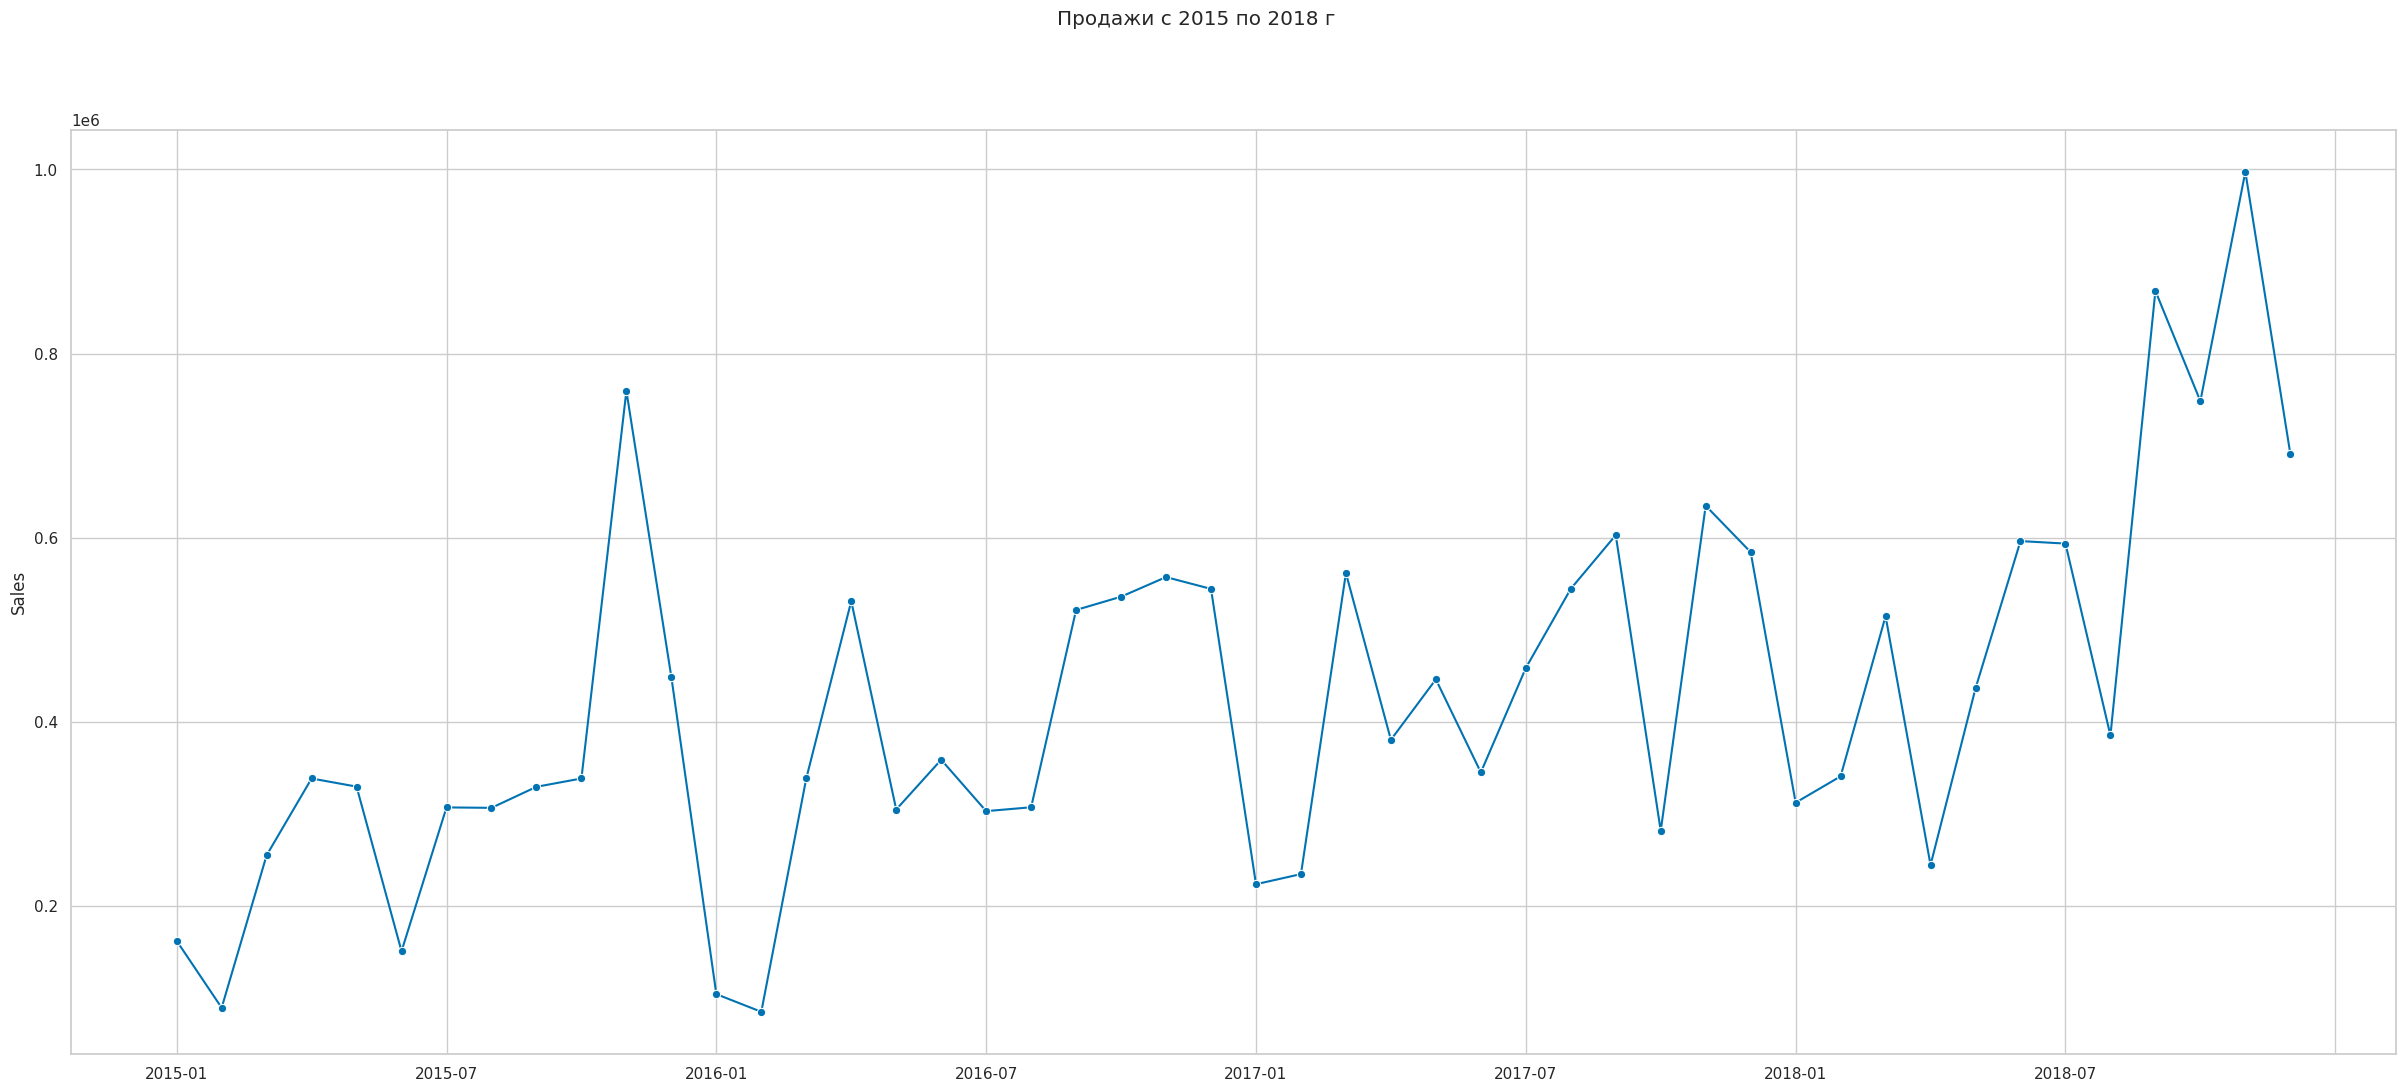

In [652]:
get_distribution(data_train)

Разделим data_train на train и test, чтобы протестировать модель

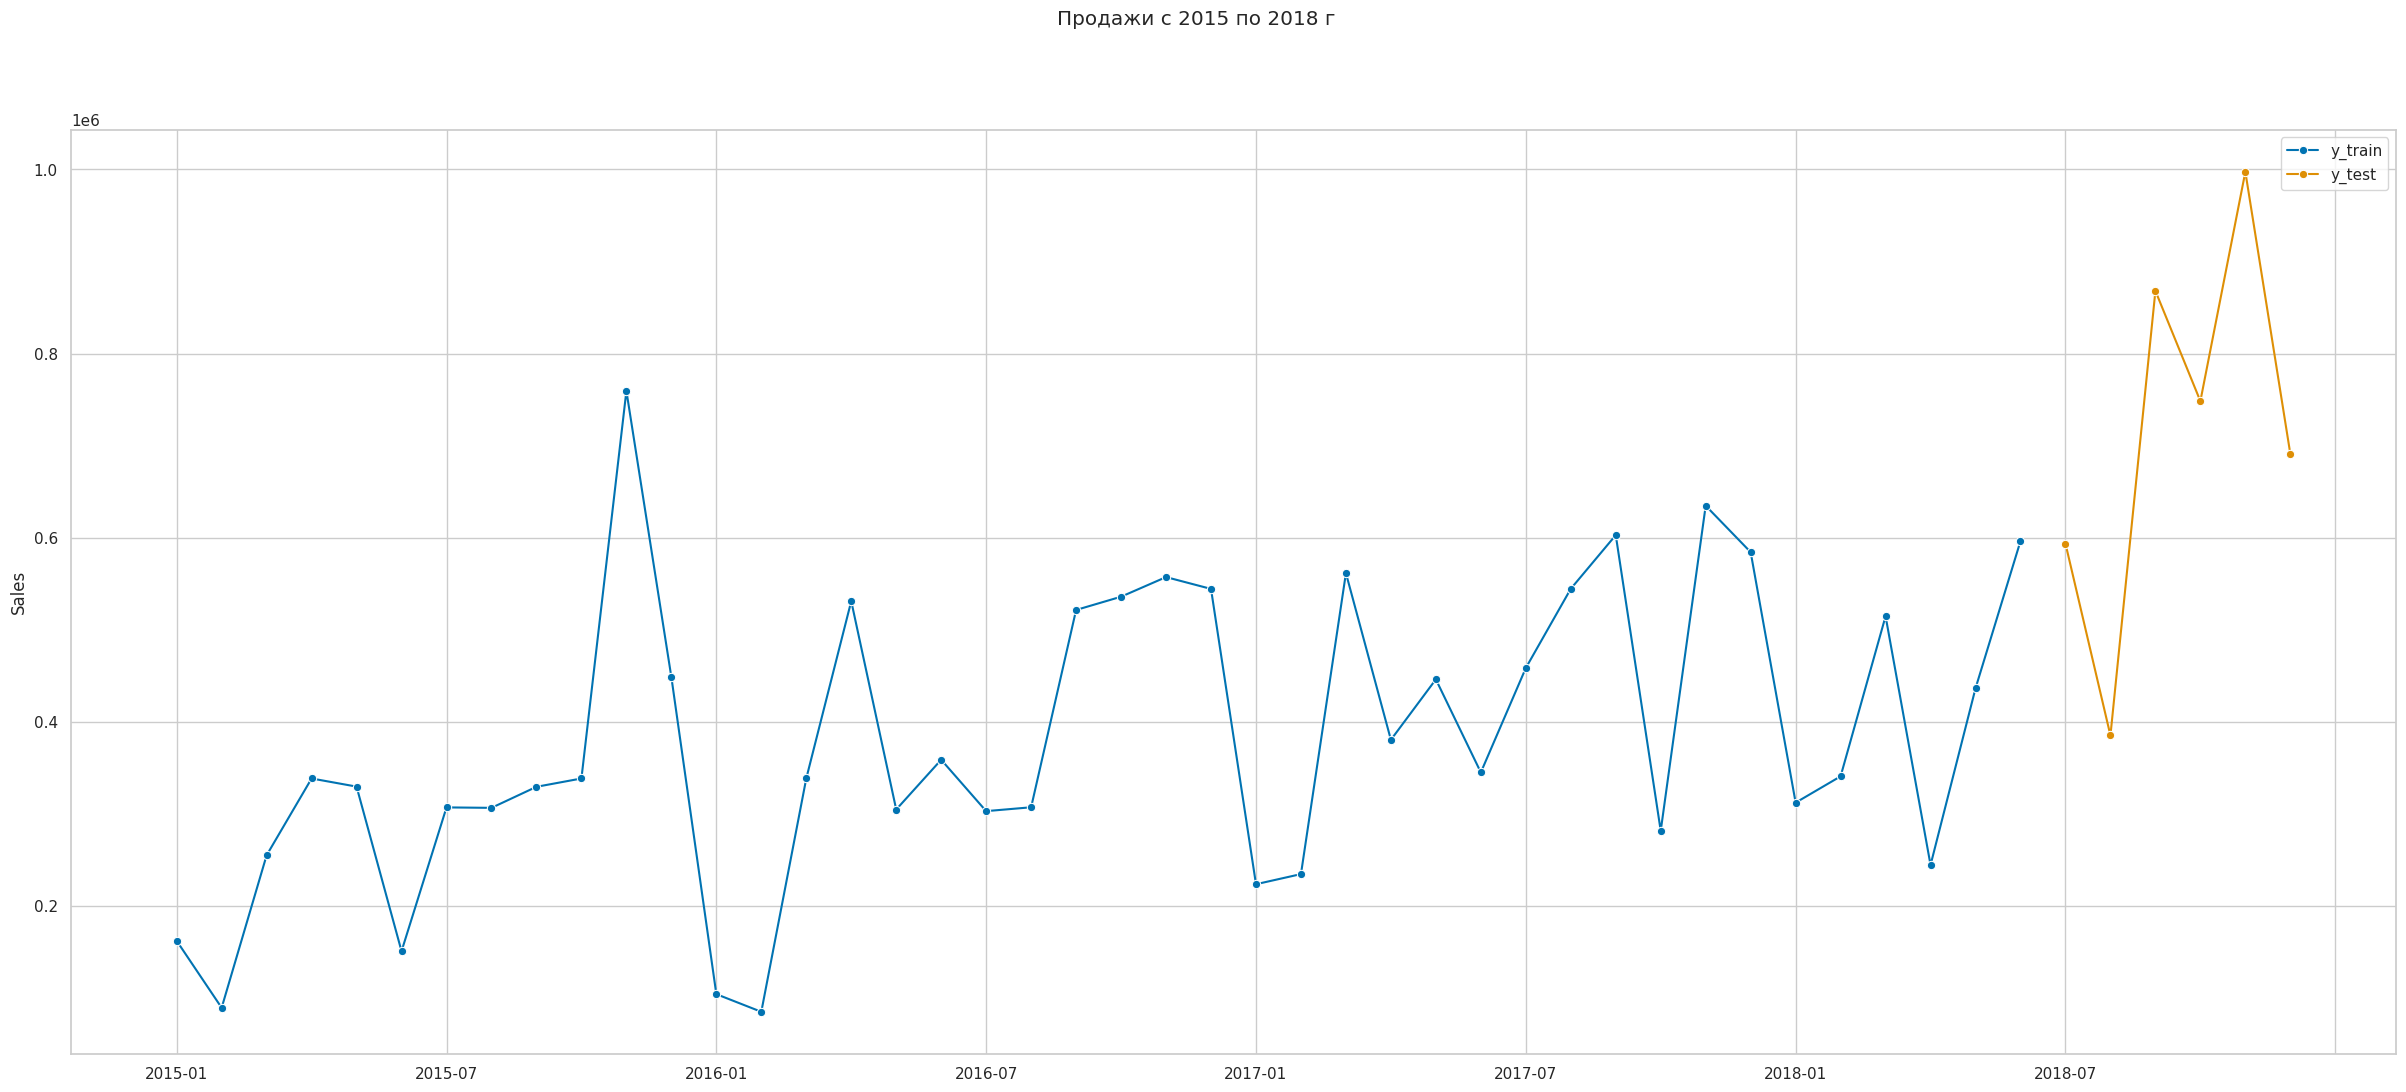

In [843]:
y_train, y_test = temporal_train_test_split(data_train, test_size=6)

get_distribution(y_train, y_test, labels=['y_train', 'y_test'])

In [844]:
fh = ForecastingHorizon(
    y_test.index, is_relative=False
)
fh

ForecastingHorizon(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'], dtype='period[M]', is_relative=False)

<br>
<font size=4><b>DecisionTreeRegressor</b></font>
<br><br>

In [845]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sktime.forecasting.compose import make_reduction

regressor = DecisionTreeRegressor(max_depth=5)
forecaster = make_reduction(regressor, strategy='recursive', window_length=29)
forecaster.fit(y_train)

CPU times: user 4.47 ms, sys: 36 µs, total: 4.51 ms
Wall time: 5.12 ms


RecursiveTabularRegressionForecaster(estimator=DecisionTreeRegressor(max_depth=5),
                                     window_length=29)

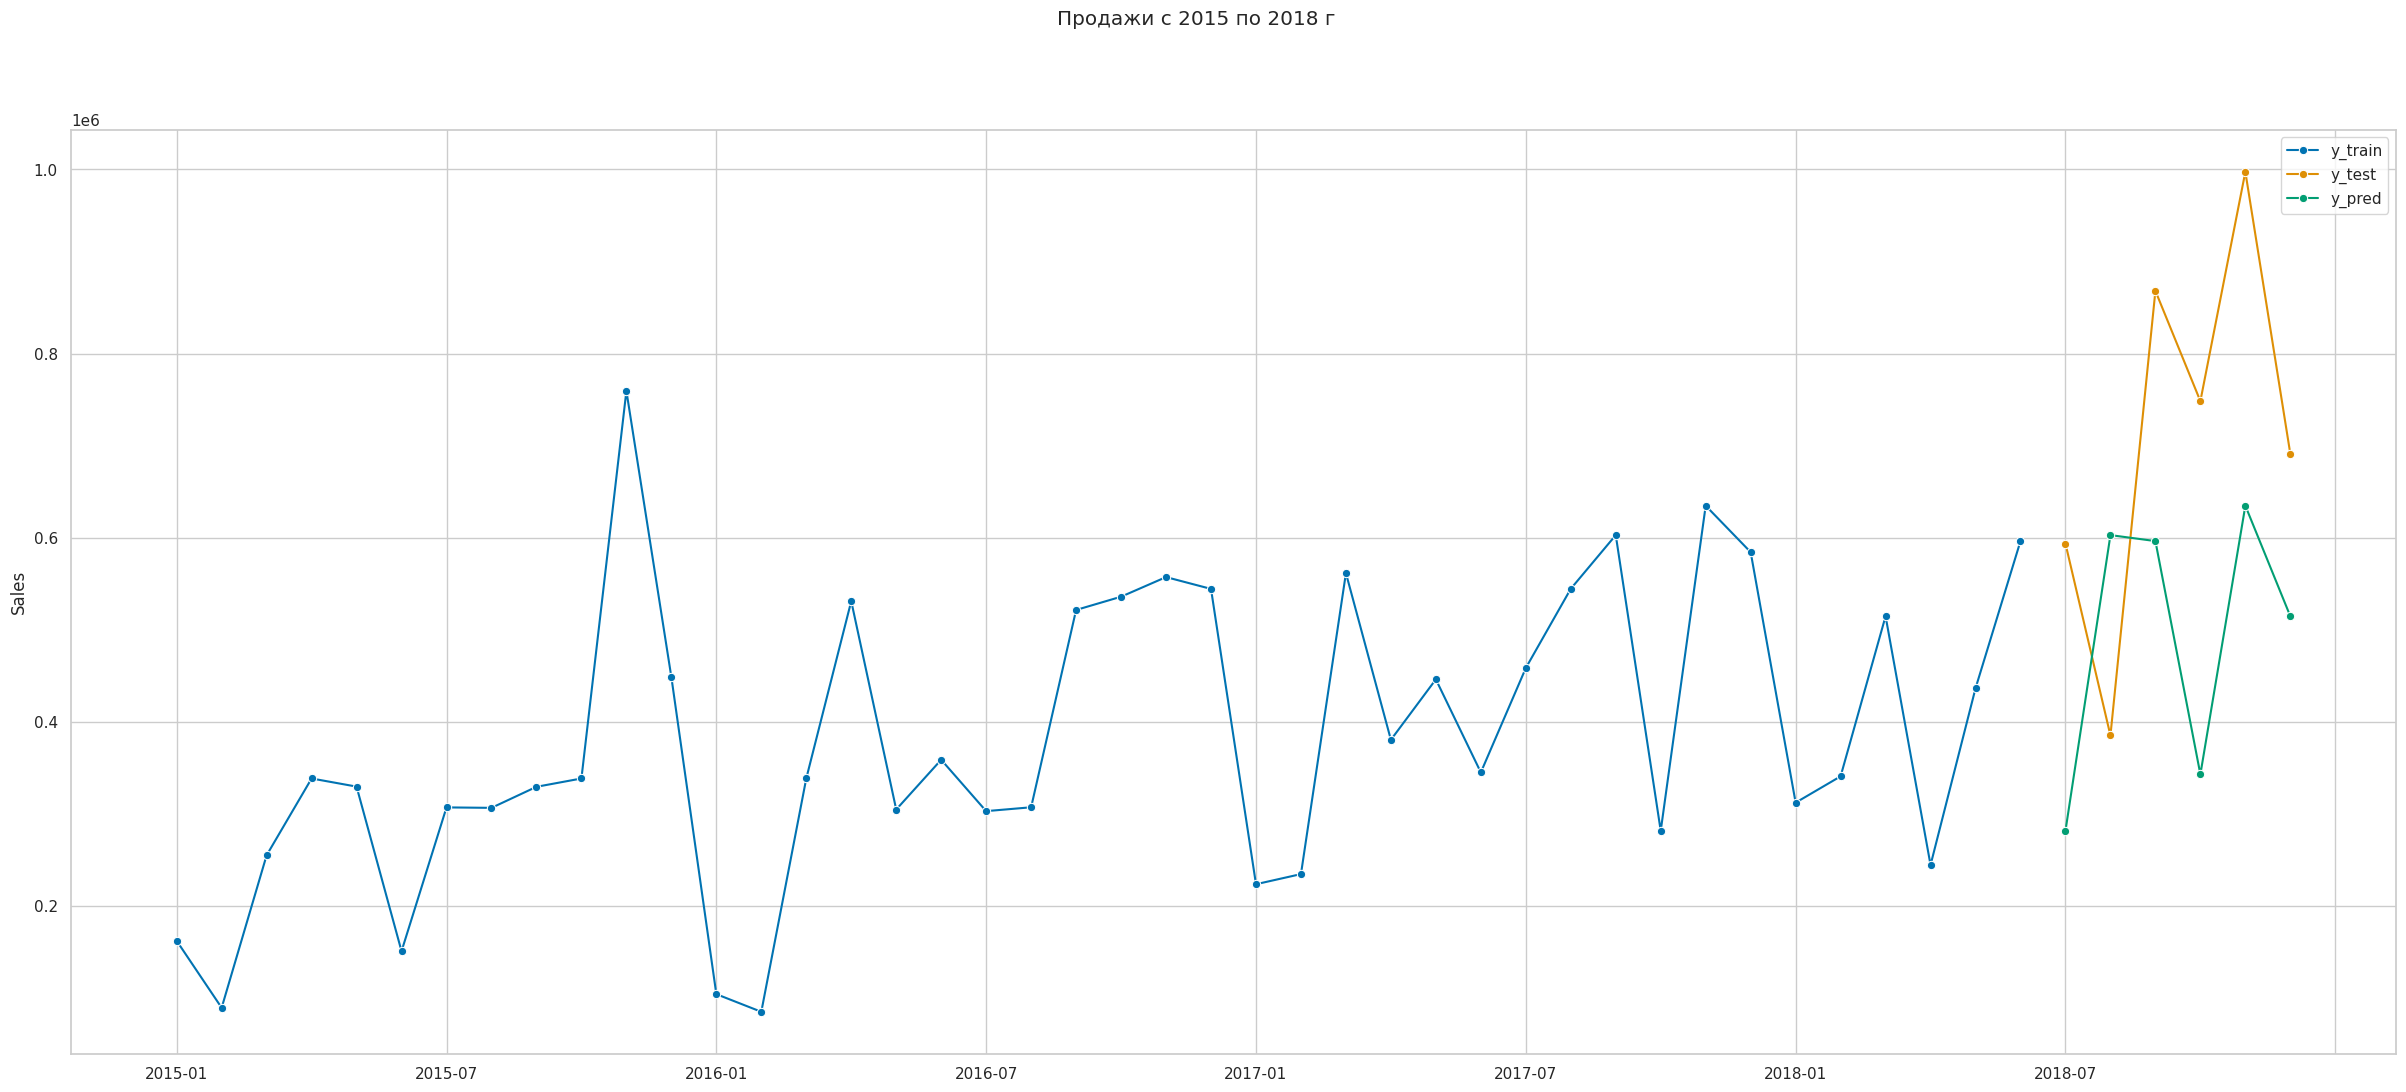

MAPE: 0.4271265074272796
MAE: 290860.15725


In [846]:
y_pred = forecaster.predict(fh)
get_distribution(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

<br>
<font size=4><b>RandomForestRegressor</b></font>
<br><br>

In [853]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction

regressor = RandomForestRegressor(n_estimators=400, max_depth=10)
forecaster = make_reduction(regressor, strategy='recursive', window_length=20)
forecaster.fit(y_train)

CPU times: user 771 ms, sys: 19 ms, total: 790 ms
Wall time: 801 ms


RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(max_depth=10,
                                                                     n_estimators=400),
                                     window_length=20)

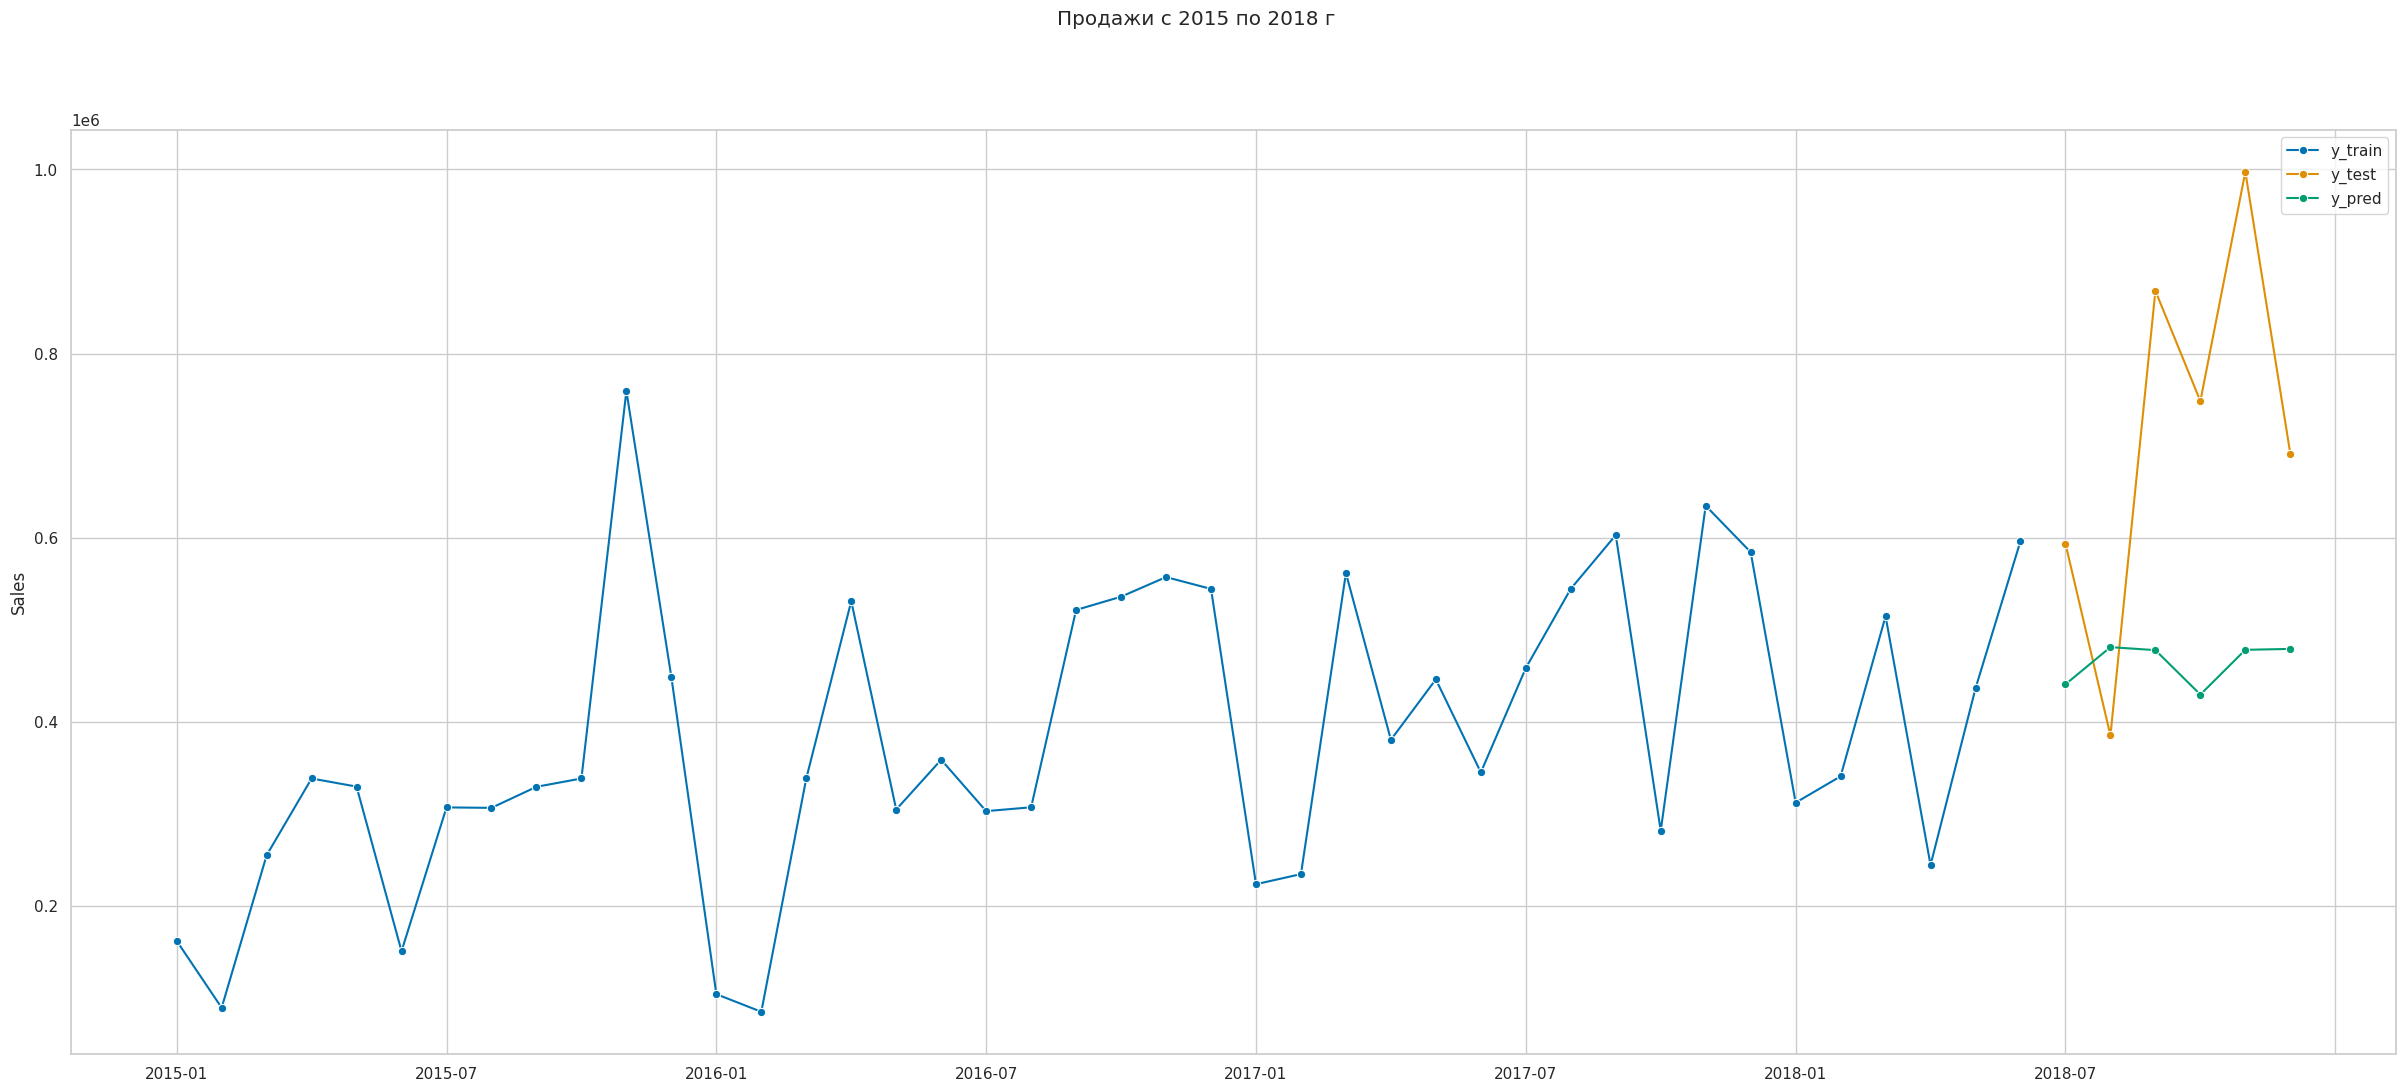

MAPE: 0.3680098301670802
MAE: 281358.9938533336
Отношение среднего числа к ошибке: 1.5063248379165988


In [854]:
y_pred = forecaster.predict(fh)
get_distribution(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Отношение среднего числа к ошибке: {data_train.mean() / mean_absolute_error(y_test, y_pred)}')

<br>
<font size=3>Прогнозирование для <b>Art:</b></font>
<br><br>

In [894]:
data_art = data[data['Sub-Category'] == 'Art']
data_art

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales-Group
6,7,09/06/2015,Стандарт,Калиниград,Art,16297.380,medium sales
18,19,27/08/2015,Второй класс,Калиниград,Art,8262.040,small sales
21,22,09/12/2017,Стандарт,Урал,Art,36816.270,big sales
31,32,17/09/2016,Стандарт,Владивосток,Art,20639.550,medium sales
33,34,17/09/2016,Стандарт,Владивосток,Art,10139.620,small sales
...,...,...,...,...,...,...,...
9731,9732,14/11/2018,Стандарт,Калиниград,Art,1214.019,small sales
9750,9751,11/10/2017,Стандарт,Урал,Art,16346.040,medium sales
9751,9752,11/10/2017,Стандарт,Урал,Art,22218.560,medium sales
9760,9761,04/11/2018,Стандарт,Москва,Art,9549.647,small sales


In [895]:
data_art['Order Date'] = data_art['Order Date'].map(lambda x: '-'.join(x.split('/')[1:]))

In [897]:
data_art = data_art.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
data_art

,Order Date,Sales
0,01-2015,178932.256
1,01-2016,146953.576
2,01-2017,193396.700
3,01-2018,354386.838
4,02-2015,51873.020
5,02-2016,204931.580
6,02-2017,50491.059
7,02-2018,143384.755
8,03-2015,553501.342
9,03-2016,157623.930


In [898]:
data_art['Order Date'] = pd.to_datetime(data_art['Order Date'], infer_datetime_format=True)
data_art

,Order Date,Sales
0,2015-01-01,178932.256
1,2016-01-01,146953.576
2,2017-01-01,193396.700
3,2018-01-01,354386.838
4,2015-02-01,51873.020
5,2016-02-01,204931.580
6,2017-02-01,50491.059
7,2018-02-01,143384.755
8,2015-03-01,553501.342
9,2016-03-01,157623.930


In [900]:
data_train = data_art.set_index('Order Date')
data_train.index = data_train.index.astype('Period[M]')
data_train = data_train['Sales'].sort_index()
data_train

Order Date
2015-01    178932.256
2015-02     51873.020
2015-03    553501.342
2015-04    306469.543
2015-05    199359.874
2015-06    340531.008
2015-07    300127.177
2015-08    258809.400
2015-09    465635.846
2015-10    166391.079
2015-11    515572.826
2015-12    351300.135
2016-01    146953.576
2016-02    204931.580
2016-03    157623.930
2016-04    405032.185
2016-05    200621.658
2016-06    183202.744
2016-07    205277.593
2016-08    282058.641
2016-09    494296.507
2016-10    309229.503
2016-11    579051.751
2016-12    724082.920
2017-01    193396.700
2017-02     50491.059
2017-03    241175.104
2017-04    409130.440
2017-05    338601.456
2017-06    342194.969
2017-07    294862.596
2017-08    170738.417
2017-09    625921.835
2017-10    385947.544
2017-11    539987.662
2017-12    575493.950
2018-01    354386.838
2018-02    143384.755
2018-03    379517.169
2018-04    524492.996
2018-05    477789.212
2018-06    417930.063
2018-07    449544.552
2018-08    366588.443
2018-09    887425.445

In [901]:
def get_distribution(*data: Union[pd.Series, list[pd.Series]], labels=None) -> None:
    """
    Функция для отрисовки графика распределения значений относительно времени
    :param data: данные для отрисовки
    """
    fig, ax = plt.subplots(figsize=(30, 12))
    fig.suptitle('Продажи с 2015 по 2018 г')
    plot_series(*data, labels=labels, ax=ax)
    plt.show()

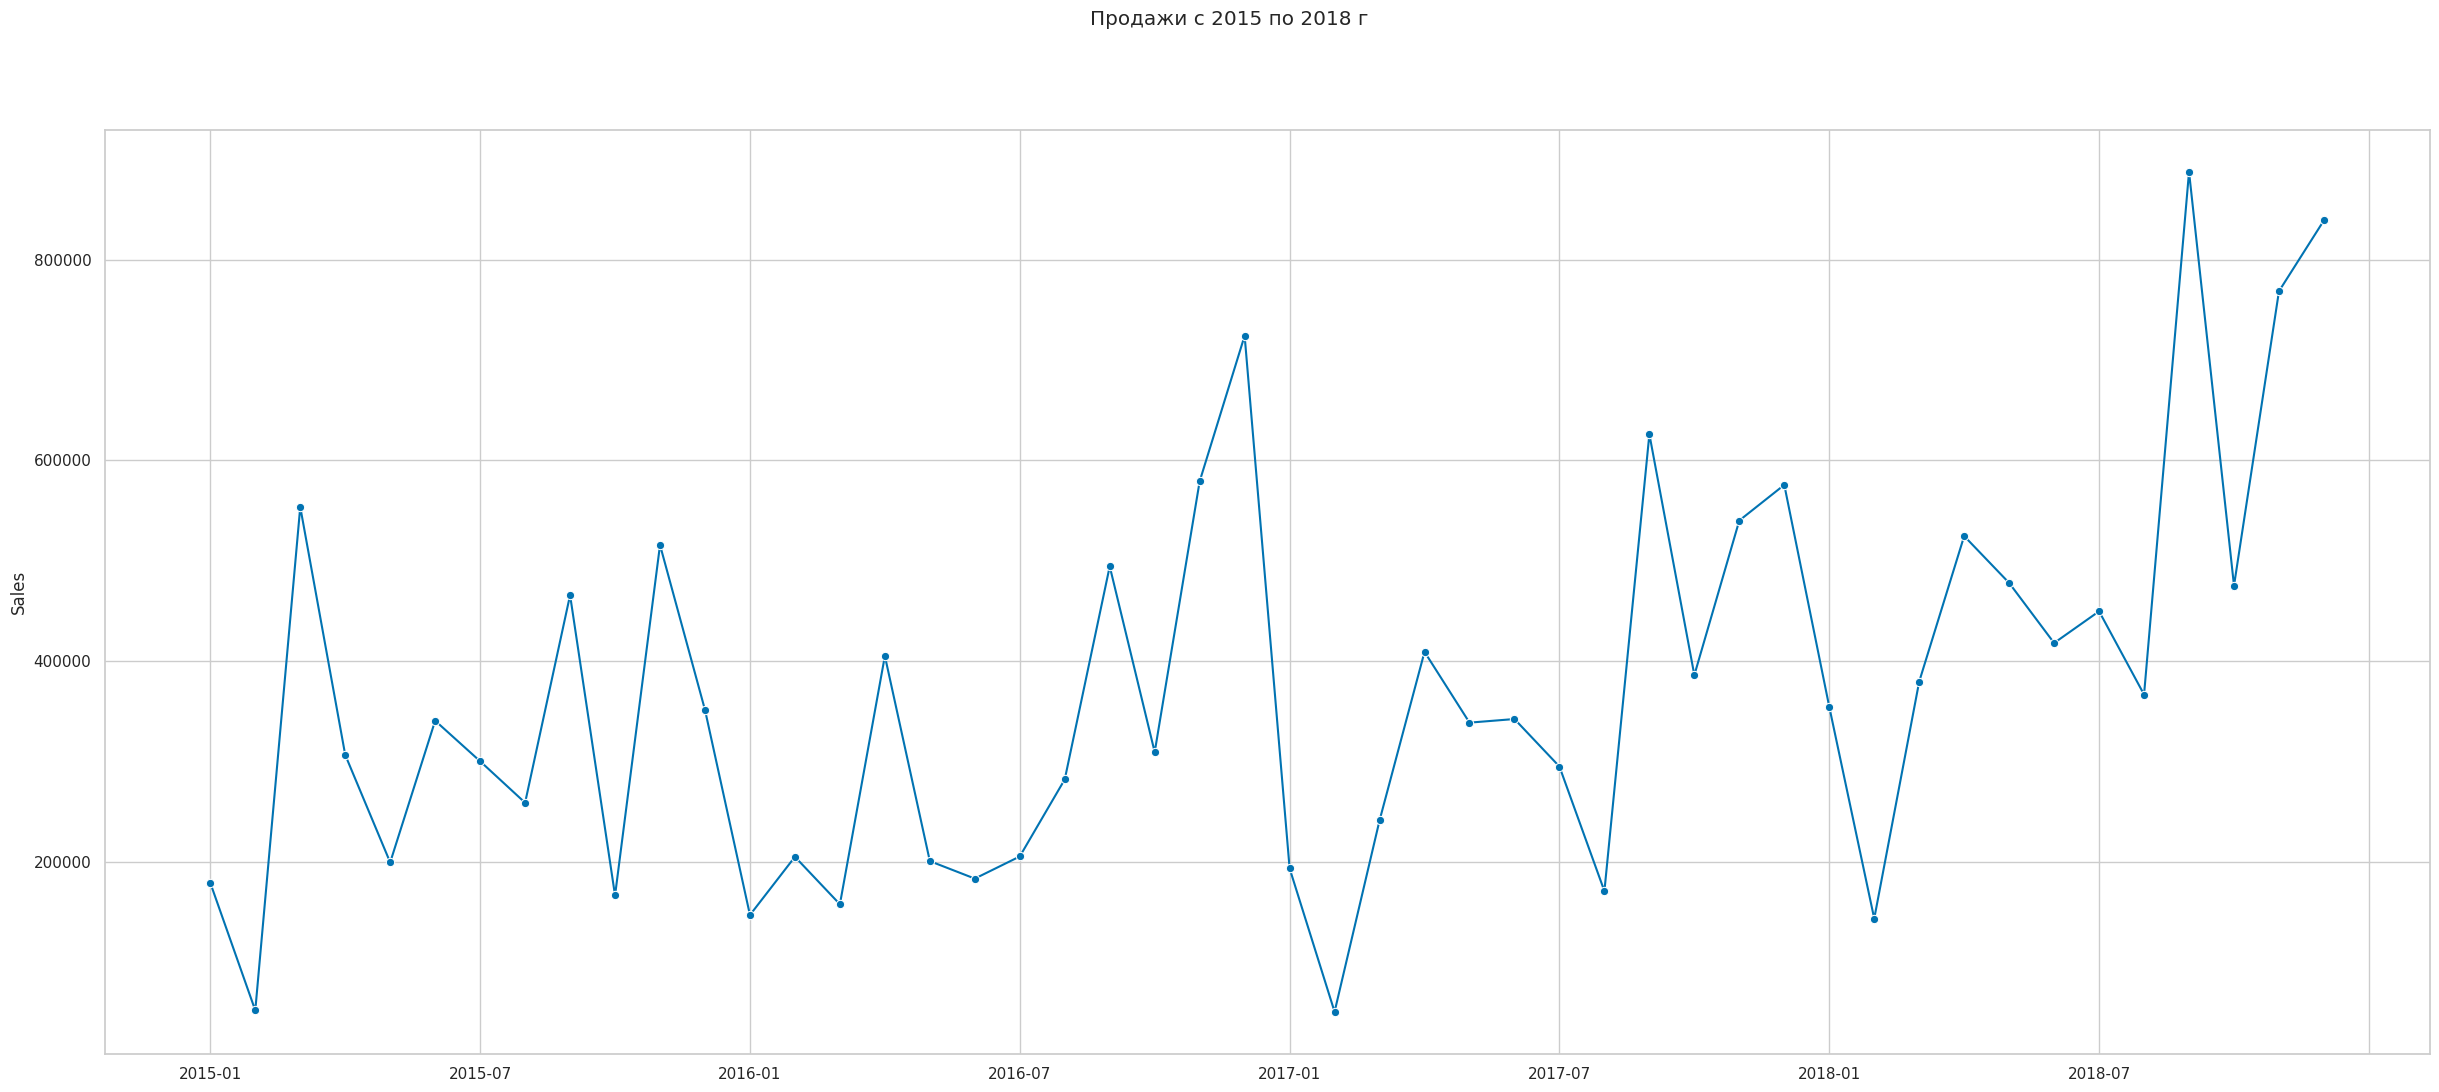

In [902]:
get_distribution(data_train)

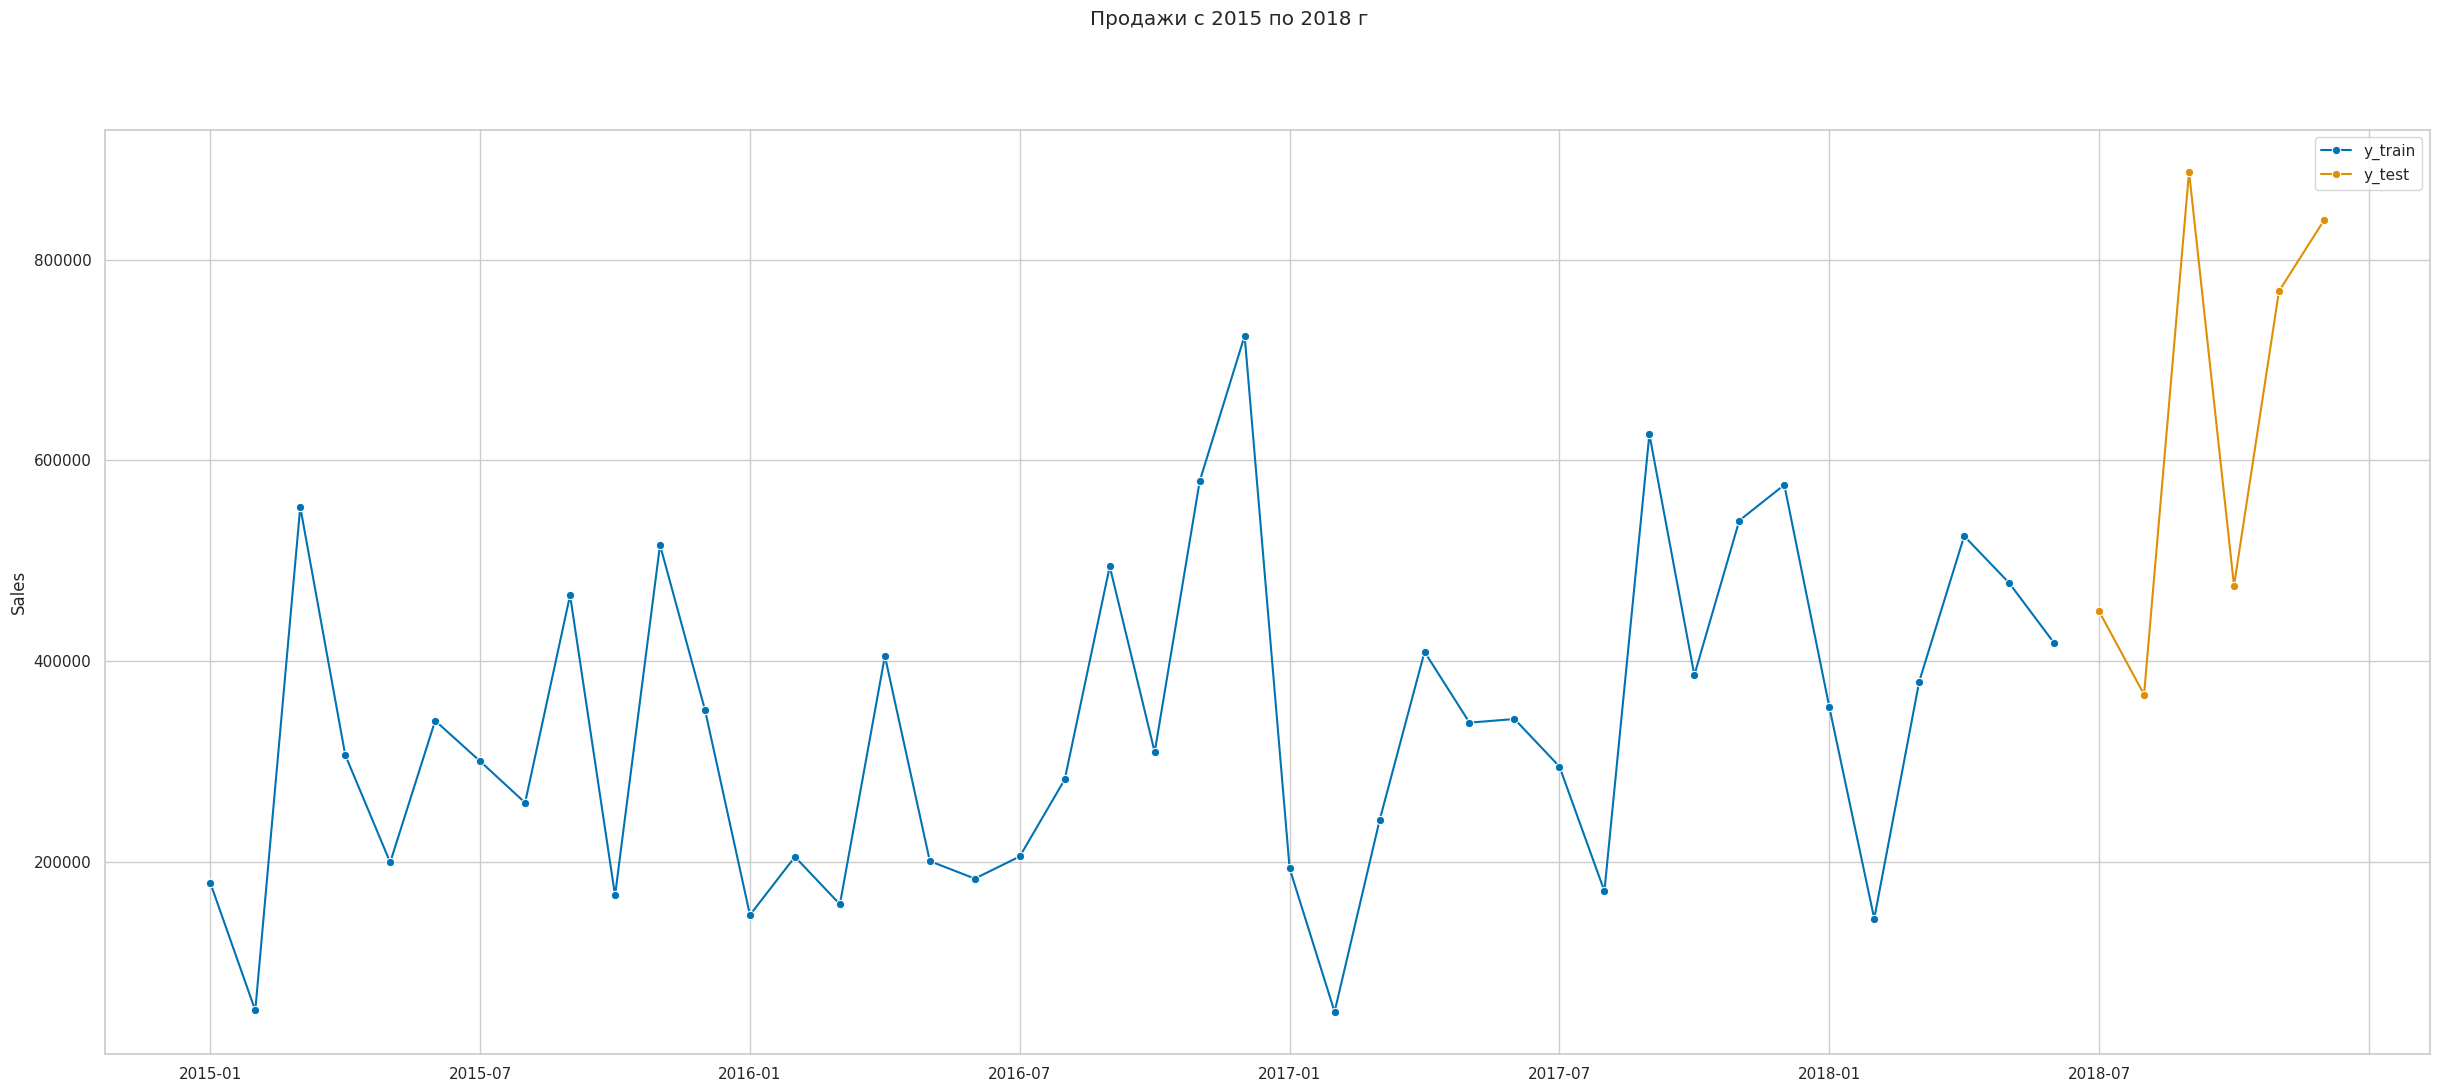

In [906]:
y_train, y_test = temporal_train_test_split(data_train, test_size=6)

get_distribution(y_train, y_test, labels=['y_train', 'y_test'])

In [908]:
fh = ForecastingHorizon(
    y_test.index, is_relative=False
)
fh

ForecastingHorizon(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'], dtype='period[M]', is_relative=False)

<br>
<font size=4><b>DecisionTreeRegressor</b></font>
<br><br>

In [964]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sktime.forecasting.compose import make_reduction

regressor = DecisionTreeRegressor(max_depth=5)
forecaster = make_reduction(regressor, strategy='recursive', window_length=25)
forecaster.fit(y_train)

CPU times: user 5.67 ms, sys: 146 µs, total: 5.82 ms
Wall time: 5.78 ms


RecursiveTabularRegressionForecaster(estimator=DecisionTreeRegressor(max_depth=5),
                                     window_length=25)

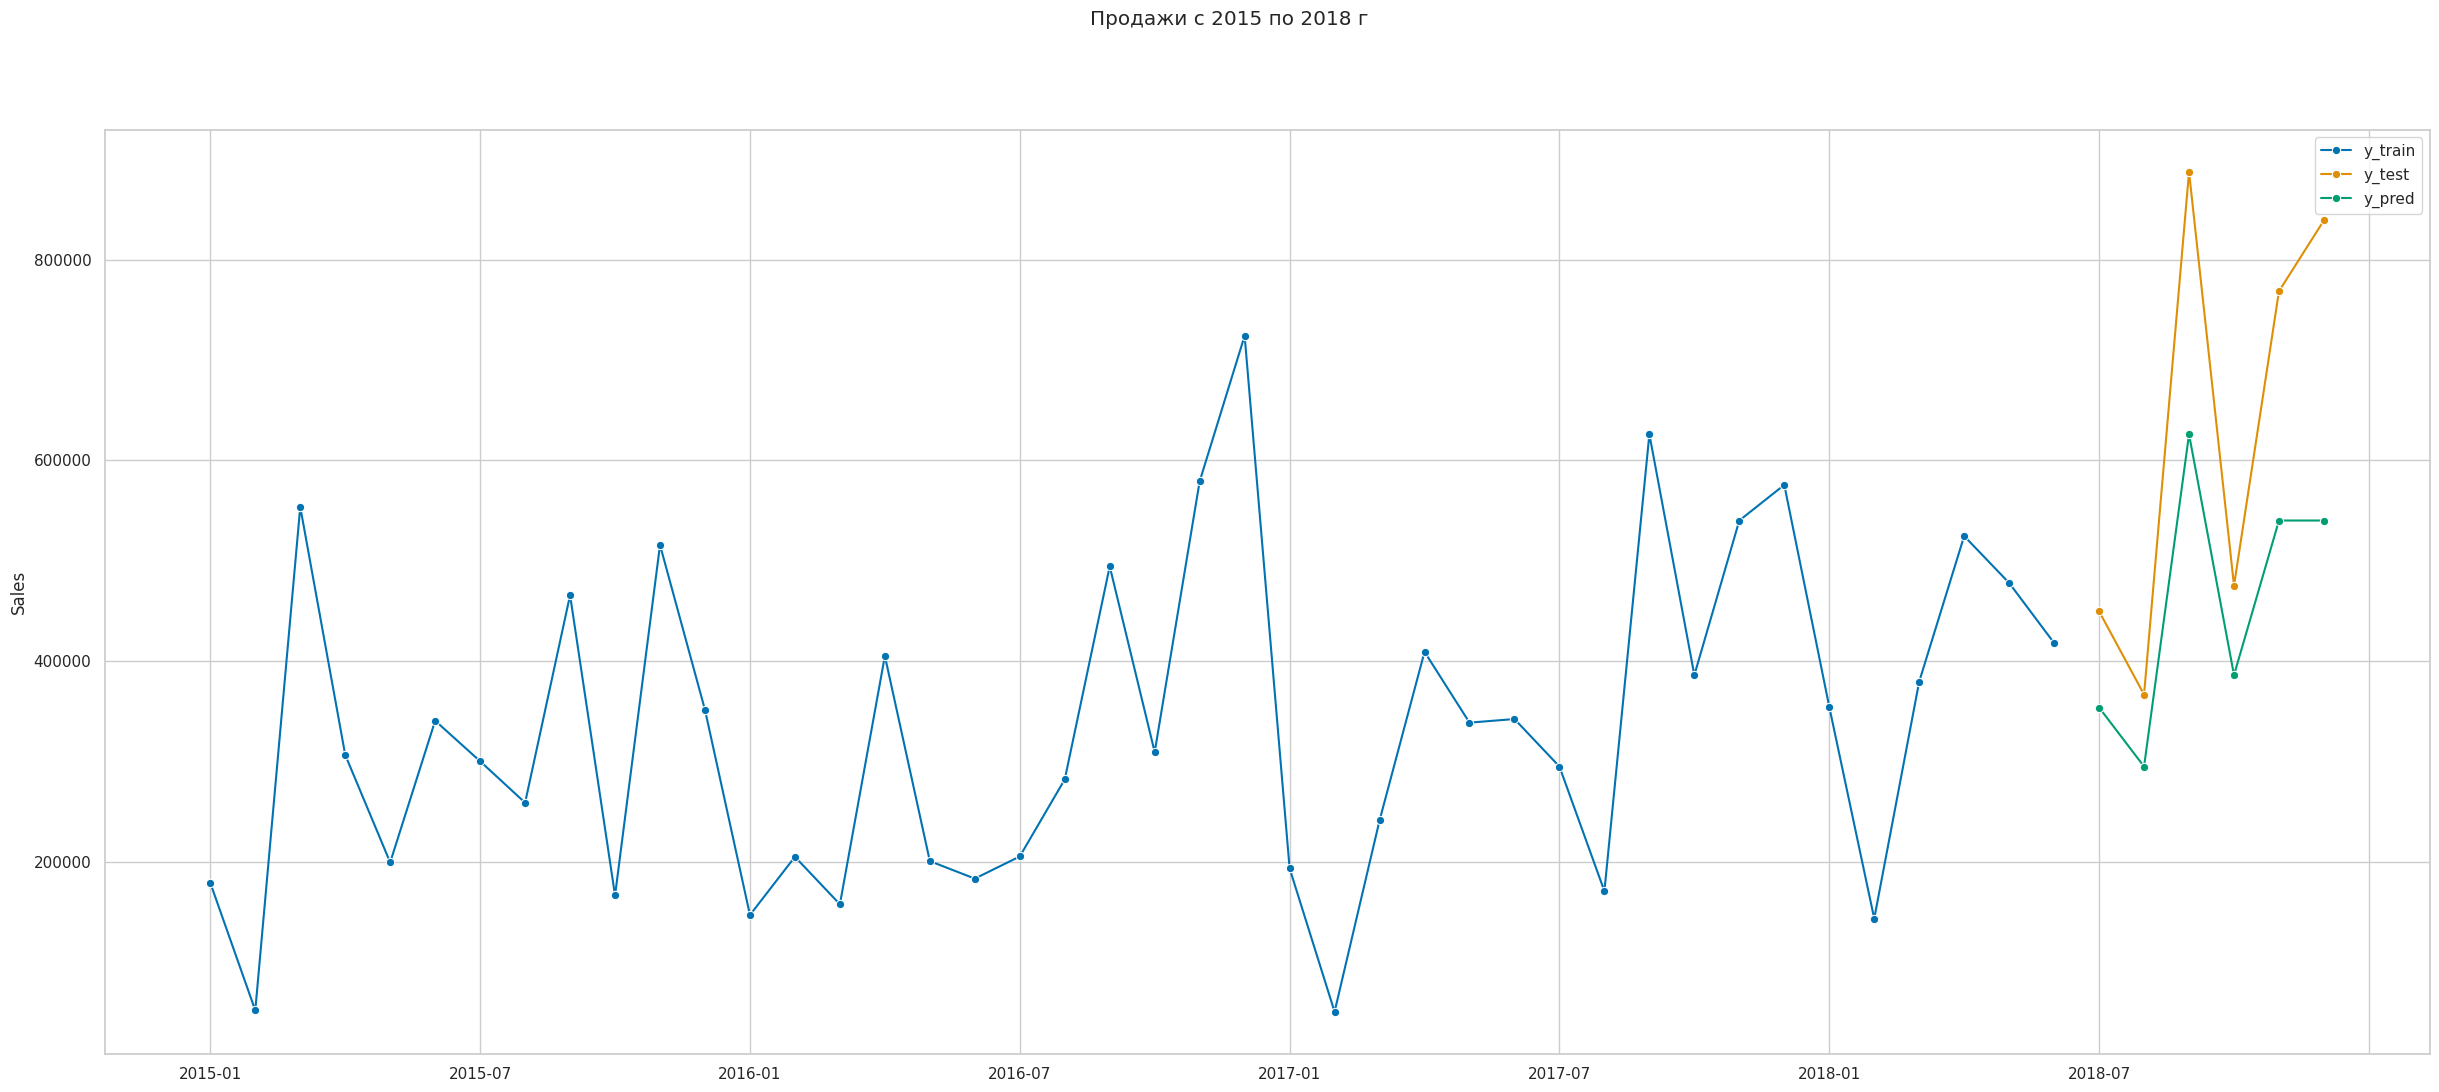

MAPE: 0.25749275123737675
MAE: 174295.34083333332


In [965]:
y_pred = forecaster.predict(fh)
get_distribution(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

<br>
<font size=4><b>RandomForestRegressor</b></font>
<br><br>

In [958]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction

regressor = RandomForestRegressor(n_estimators=400, max_depth=10)
forecaster = make_reduction(regressor, strategy='recursive', window_length=26)
forecaster.fit(y_train)

CPU times: user 762 ms, sys: 14.5 ms, total: 776 ms
Wall time: 801 ms


RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(max_depth=10,
                                                                     n_estimators=400),
                                     window_length=26)

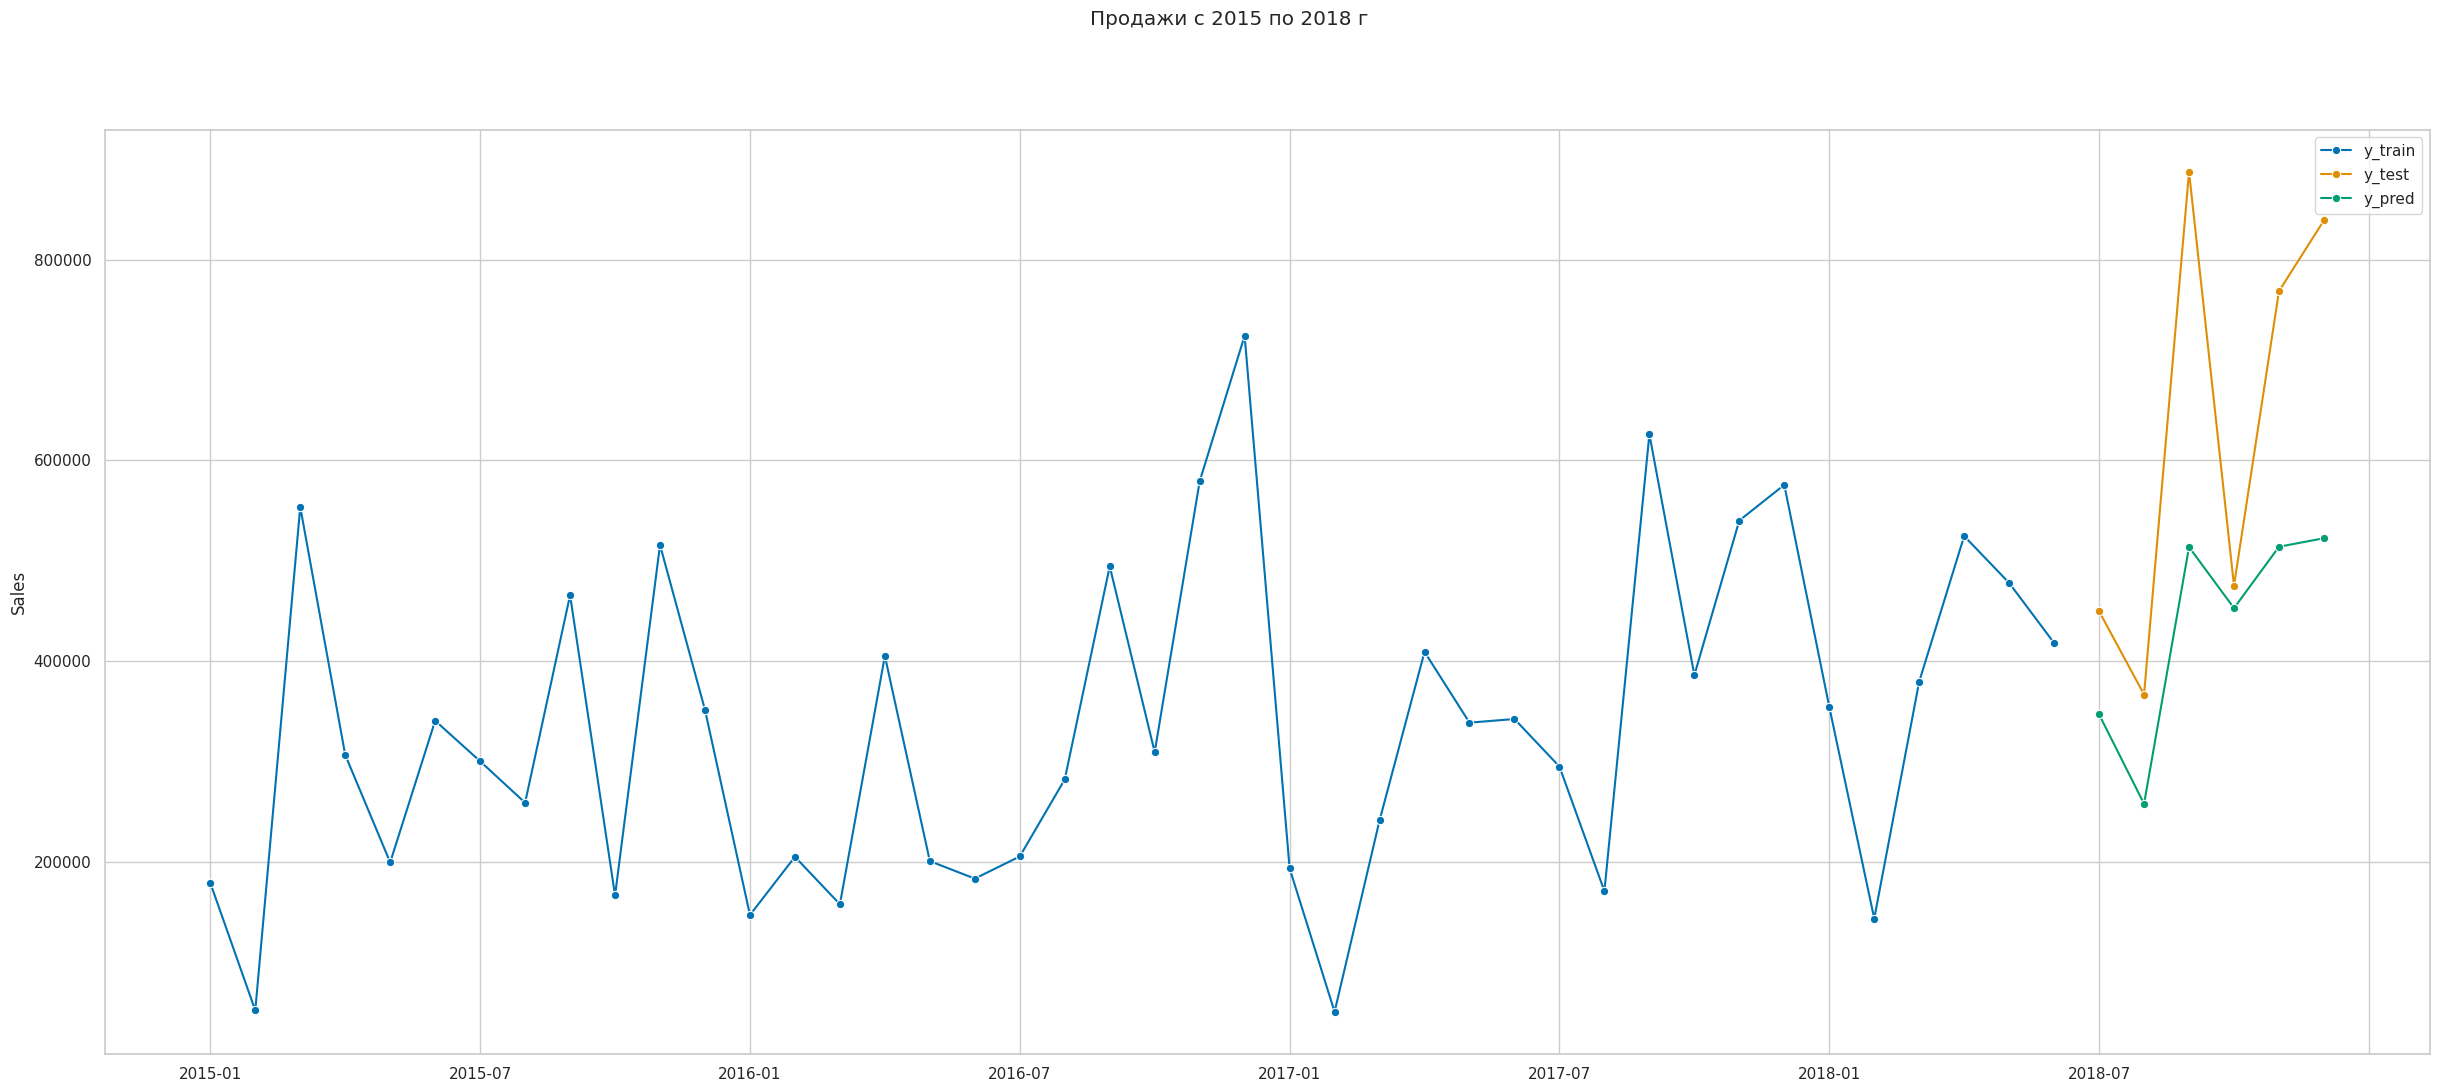

MAPE: 0.2838139985172194
MAE: 196541.3437341672
Отношение среднего числа к ошибке: 1.8902366558304742


In [959]:
y_pred = forecaster.predict(fh)
get_distribution(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Отношение среднего числа к ошибке: {data_train.mean() / mean_absolute_error(y_test, y_pred)}')

<br>
<font size=4> Предсказание на первую половину 2019 года</font>
<br><br>

In [980]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2019-01-01", periods=6, freq="M")), is_relative=False
)

regressor = DecisionTreeRegressor(max_depth=5)
forecaster = make_reduction(regressor, strategy='recursive', window_length=29)
forecaster.fit(data_train)

RecursiveTabularRegressionForecaster(estimator=DecisionTreeRegressor(max_depth=5),
                                     window_length=29)

In [981]:
data_pred = forecaster.predict(fh)

In [986]:
result = pd.DataFrame(data_pred).reset_index().rename(columns={'index': 'Date'})
result

,Date,Sales
0,2019-01,417930.063
1,2019-02,477789.212
2,2019-03,524492.996
3,2019-04,887425.445
4,2019-05,839058.877
5,2019-06,417930.063


<br>
<font size=4><b>Вывод</b></font><br><br>
Построенная модель показывает довольно большие ошибки. Возможно, это связанно с размером датасета. Просуммировав sales по месяцам, я получил в наборе до 50 точек, что очень мало. 
Можно было бы попробовать обучить модель по дням, но их не хватало в датасете.
Также неплохо было бы попробовать другие модели и мб библиотеки.
<br><br>